In [1]:
# -*- coding: utf-8 -*-
"""
Created on 2023/04/11
Revised on 2023/05/30
 
@author: mjofre - Marc Jofre
e-mail: marc.jofre@upc.edu
Technical University of Catalonia - Universitat Politècnica de Catalunya (UPC)
"""
###########################################################################
# Seminar on Quantum Technologies for Cybersecurity: Networking and Systems
# Class
# Session 3 - Key building blocks

import os, sys, time
import numpy as np
import math
import matplotlib.pyplot as plt
from google.colab import files
import matplotlib.style
import matplotlib as mpl
#print(plt.style.available)
mpl.style.use('default')

try:  
  import qiskit
except:
  print("installing qiskit...")
  !pip install qiskit --quiet
  print("installed qiskit.")
  import qiskit


installing qiskit...
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 60.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.7/129.7 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 8.2 MB/s eta 0:00:00
installed qiskit.


# Practical Quantum Key Distribution

# Definition of Transmission calculations for Quantum Key distribution
# Just run this cell

In [ ]:
def TransmissionBB84DecoyStateComputeSKRcontinuousphase(SourcePulseRate,DecoyStatesRates,DecoyStatesPhotPulse,AttenuationdBforDistance,SystemDetectorPerformanceArray,DVQKDprotocol):
    # H.-K. Lo, X. Ma, and K. Chen, “Decoy State Quantum Key Distribution,” Phys. Rev. Lett., vol. 94, no. 23, p. 230504, Jun. 2005, doi: 10.1103/PhysRevLett.94.230504.
    
    RateAlice=SourcePulseRate
    Nlen=len(AttenuationdBforDistance)
    alphaLink=0.1 # 0.1 dB/Km link loss free-space attenuation#0.2dB/Km for 1550nm telecom fiber
    Distance=AttenuationdBforDistance/alphaLink*1000.0#np.linspace(0,350000,len(Measured_EMu))
    #Distance_plot=Distance*1e-3
    
    Y0=SystemDetectorPerformanceArray[0]
    e0=SystemDetectorPerformanceArray[1]
    transmittanceBob=SystemDetectorPerformanceArray[2]
    attDetectors=SystemDetectorPerformanceArray[3]

    MuRate=DecoyStatesRates[0] # Rate of signal states sent
    Nu1Rate=DecoyStatesRates[1] # Rate of decoy 1 states sent
    Nu2Rate=DecoyStatesRates[2] # Rate of decoy 2 states sent
    
    if ((MuRate+Nu1Rate+Nu2Rate)!=1.0):
        print('MuRate+Nu1Rate+Nu2Rate: '+str(MuRate+Nu1Rate+Nu2Rate))
        print('Error in the settings rates of the signal and decoy rates (MuRate+Nu1Rate+Nu2Rate)!=1.0')
        return
    
    fe=1.16 # bidirectional error correction factor
    
    Mu=DecoyStatesPhotPulse[0]#0.5
    Nu1=DecoyStatesPhotPulse[1]#Mu*np.power(10,(-4.65/10.0))
    Nu2=DecoyStatesPhotPulse[2]#Mu*np.power(10,(-14.76/10.0))
    
    attLink=np.power(10,(-(alphaLink/10.0)*(Distance/1000.0))) # Channel transmittance
    attBob=attDetectors*transmittanceBob # denote the transmittance in Bob's side: internal transmittance of optical components and detector efficiency
    att=attLink*attBob#*(1-1/50); # Overall transmission and detection efficiency between Alice and Bob
    
    RateOutputAlice_signal=RateAlice*Mu # Rate of signals states sent out by Alice
    RKR_plot=RateOutputAlice_signal*att # RKR due to signal states
    
    # Yield of a i-photon pulse
    Y1 = Y0+(1-(1-att)**1)
    Y2 = Y0+(1-(1-att)**2)
    
    # Fung, C.-H.F., Tamaki, K., Lo, H.-K.: Performance of two quantum-key-distribution protocols. Phys. Rev. A 73(1), 012337 (2006)
    # Ma, X., Qi, B., Zhao, Y., Lo, H.-K.: Practical decoy state for quantum key distribution. Phys. Rev. A 72(1), 012326 (2005)
    # Gain of states
    QMu = Y0+1-np.exp(-att*Mu) # Gain of the signal state. Equivalent to Y0 if Mu=0
    QNu1 = Y0+1-np.exp(-att*Nu1) # Gain of the decoy state. Equivalent to Y0 if Nu1=0
    QNu2 = Y0+1-np.exp(-att*Nu2) # Gain of the vacuum state. Equivalent to Y0 if Nu2=0

    edetector=0#1.0-cos(atan(0.05))**2#0.01; # Probability that a photon hits the wrong detector. It has to due with misalignment and finite PER of polarization splitters
    EMu = (e0*Y0+edetector*(1-np.exp(-att*Mu)))/QMu # QBER for the signal state
    ENu1 = (e0*Y0+edetector*(1-np.exp(-att*Nu1)))/QNu1 # QBER for the decoy state
    ENu2 = (e0*Y0+edetector*(1-np.exp(-att*Nu2)))/QNu2 # QBER for the vacuum state
        
    ## Computations theoretical
    #print('Nu1: '+str(Nu1))
    #print('Nu2: '+str(Nu2))
    #print('QNu1: '+str(QNu1))
    #print('QNu2: '+str(QNu2))
    
    Y0LowerBound = (Nu1*QNu2*np.exp(Nu2)-Nu2*QNu1*np.exp(Nu1))/(Nu1-Nu2) # Yield.
    if (np.sum(Y0LowerBound<0.0)>0):
        Y0LowerBound[Y0LowerBound<0.0]=0.0
    
    Y1LowerBound = (np.exp(-Mu))/(Mu*Nu1-Mu*Nu2-Nu1**2+Nu2**2)*(QNu1*np.exp(Nu1)-QNu2*np.exp(Nu2)-(Nu1**2-Nu2**2)/(Mu**2)*(QMu*np.exp(Mu)-Y0LowerBound)) # Yield of single photon pulses
    if (np.sum(Y1LowerBound<0.0)>0):
        Y1LowerBound[Y1LowerBound<0.0]=0.0
    
    Y2LowerBound = Y2# approx #(np.exp(-Mu))/(Mu*Nu1-Mu*Nu2-Nu1**2+Nu2**2)*(QNu1*np.exp(Nu1)-QNu2*np.exp(Nu2)-(Nu1**2-Nu2**2)/(Mu**2)*(QMu*np.exp(Mu)-Y0LowerBound)) # Yield of two-photon pulses
    if (np.sum(Y2LowerBound<0.0)>0):
        Y2LowerBound[Y2LowerBound<0.0]=0.0
    
    Q0LowerBound = Mu*np.exp(-Mu)*Y0LowerBound # Gain of the vacuum-photon pulses.    
    Q1LowerBound = Mu*np.exp(-Mu)*Y1LowerBound # Gain of the single photon pulses.
    Q2LowerBound = ((Mu**2)/2)*np.exp(-Mu)*Y2LowerBound # Gain of the two-photon pulses. # # Ma, X., Qi, B., Zhao, Y., Lo, H.-K.: Practical decoy state for quantum key distribution. Phys. Rev. A 72(1), 012326 (2005)

    e0Bound=e0*np.ones((int(len(Y0LowerBound))),dtype=np.float32)
    e1UpperBound = (EMu*QMu*np.exp(Mu)-e0Bound*Y0LowerBound)/(Q1LowerBound*np.exp(Mu)) # Error rate of single photon pulses
    e2UpperBound = (EMu*QMu*np.exp(Mu)-e0Bound*Y0LowerBound)/(Q2LowerBound*np.exp(Mu))#1-(1-(EMu*QMu*np.exp(Mu)-e0Bound*Y0LowerBound)/(Q2LowerBound*np.exp(Mu)))**2 # Error rate of two-photon pulses
    
    if (np.sum(e1UpperBound<0.0)>0):
        e1UpperBound[e1UpperBound<0.0]=0.0
    
    if (np.sum(e1UpperBound>1.0)>0):
        e1UpperBound[e1UpperBound>1.0]=1.0
    
    if (np.sum(e2UpperBound<0.0)>0):
        e2UpperBound[e2UpperBound<0.0]=0.0
    
    if (np.sum(e2UpperBound>1.0)>0):
        e2UpperBound[e2UpperBound>1.0]=1.0
    
    QBER=e1UpperBound # QBER due only to single-photon. In general the bit error ratio of n-photon signals being e_n=Y_0/(2*Y_n)
    
    H2EMu=np.zeros(int(len(EMu)),dtype=np.float32)
    for iIter in range(0,len(EMu),1):
        if (EMu[iIter]<=0.0):
            H2EMu[iIter]=0.0
        else:
            H2EMu[iIter] = -EMu[iIter]*np.log2(EMu[iIter])-(1.0-EMu[iIter])*np.log2(1.0-EMu[iIter])
    
    H2e0Upper=np.zeros(int(len(e0Bound)),dtype=np.float32)
    for iIter in range(0,len(e0Bound),1):
        if ((e0Bound[iIter]<=0.0) or (e0Bound[iIter]>=1.0)):
            H2e0Upper[iIter]=0.0
        else:
            H2e0Upper[iIter] = -e0Bound[iIter]*np.log2(e0Bound[iIter])-(1.0-e0Bound[iIter])*np.log2(1.0-e0Bound[iIter])
    
    H2e1Upper=np.zeros(int(len(e1UpperBound)),dtype=np.float32)
    for iIter in range(0,len(e1UpperBound),1):
        if ((e1UpperBound[iIter]<=0.0) or (e1UpperBound[iIter]>=1.0)):
            H2e1Upper[iIter]=0.0
        else:
            H2e1Upper[iIter] = -e1UpperBound[iIter]*np.log2(e1UpperBound[iIter])-(1.0-e1UpperBound[iIter])*np.log2(1.0-e1UpperBound[iIter])
    
    H2e2Upper=np.zeros(int(len(e2UpperBound)),dtype=np.float32)
    for iIter in range(0,len(e2UpperBound),1):
        if ((e2UpperBound[iIter]<=0.0) or (e2UpperBound[iIter]>=1.0)):
            H2e2Upper[iIter]=0.0
        else:
            H2e2Upper[iIter] = -e2UpperBound[iIter]*np.log2(e2UpperBound[iIter])-(1.0-e2UpperBound[iIter])*np.log2(1.0-e2UpperBound[iIter])
    
    # Lower Secure Key Rate
    if (DVQKDprotocol=='SARG04+decoy'): # One-photon and 2-photon pulses contribute
      CoincidenceSameBasePrepMeas=0.25 # For SARG04 it is 0.25.
      KeyBitRateLowerBond = CoincidenceSameBasePrepMeas*(-QMu*fe*H2EMu + Q1LowerBound*(1.0-H2e1Upper)+Q2LowerBound*(1.0-H2e2Upper))*RateOutputAlice_signal
    else: # for instance 'BB84+decoy' only one-photon pulses contribute
      CoincidenceSameBasePrepMeas=0.5 # For BB84 it is 0.5; for SARG04 it is 0.25.
      KeyBitRateLowerBond = CoincidenceSameBasePrepMeas*(-QMu*fe*H2EMu + Q1LowerBound*(1.0-H2e1Upper))*RateOutputAlice_signal#CoincidenceSameBasePrepMeas*(-QMu*fe*H2EMu + Q0LowerBound*(1.0-H2e0Upper) + Q1LowerBound*(1.0-H2e1Upper))*RateOutputAlice_signal
    
    if (np.sum(KeyBitRateLowerBond<0.0)>0):
        KeyBitRateLowerBond[KeyBitRateLowerBond<0.0]=0.0
        
    # Remove glitches
    for iIter in range(1,int(Nlen-2),1):
        if (np.logical_and(KeyBitRateLowerBond[iIter-1]<=0.0,KeyBitRateLowerBond[iIter+1]<=0.0) or np.logical_and(KeyBitRateLowerBond[iIter-2]<=0.0,KeyBitRateLowerBond[iIter+2]<=0.0)):
            KeyBitRateLowerBond[iIter]=0.0
    
    if (np.sum(KeyBitRateLowerBond<=0.0)>0):
        QBER[KeyBitRateLowerBond<=0.0]=0.5
    
    if (np.sum(QBER>=0.5)>0): # Not to be displayed in the image
        QBER[QBER>=0.5]=0.0
        
    return attLink,RKR_plot,KeyBitRateLowerBond,QBER

def TransmissionBB84DecoyStateComputeSKRdiscretephase(SourcePulseRate,DecoyStatesRates,DecoyStatesPhotPulse,AttenuationdBforDistance,Nphases,SystemDetectorPerformanceArray,DVQKDprotocol):
    Nphases=int(np.min([16,np.max([1.0,Nphases])]))
    NphasesValue=np.linspace(0,2*np.pi,Nphases) # Nphases different values each with probability 1/Nphases over [0, 2*np.pi)]
    Nlen=len(AttenuationdBforDistance)
    RateAlice=SourcePulseRate
    alphaLink=0.1 # 0.1 dB/Km link loss free-space attenuation#0.2dB/Km for 1550nm telecom fiber
    Distance=AttenuationdBforDistance/alphaLink*1000.0#np.linspace(0,350000,len(Measured_EMu))
    #Distance_plot=Distance*1e-3

    Y0=SystemDetectorPerformanceArray[0]
    e0=SystemDetectorPerformanceArray[1]
    transmittanceBob=SystemDetectorPerformanceArray[2]
    attDetectors=SystemDetectorPerformanceArray[3]
    
    MuRate=DecoyStatesRates[0] # Rate of signal states sent
    Nu1Rate=DecoyStatesRates[1] # Rate of decoy 1 states sent
    Nu2Rate=DecoyStatesRates[2] # Rate of decoy 2 states sent
    
    if ((MuRate+Nu1Rate+Nu2Rate)!=1.0):
        print('MuRate+Nu1Rate+Nu2Rate: '+str(MuRate+Nu1Rate+Nu2Rate))
        print('Error in the settings rates of the signal and decoy rates (MuRate+Nu1Rate+Nu2Rate)!=1.0')
        return
    
    fe=1.16 # bidirectional error correction factor
    
    Mu=DecoyStatesPhotPulse[0]#0.5
    Nu1=DecoyStatesPhotPulse[1]#Mu*np.power(10,(-4.65/10.0))
    Nu2=DecoyStatesPhotPulse[2]#Mu*np.power(10,(-14.76/10.0))
    
    attLink=np.power(10,(-(alphaLink/10.0)*(Distance/1000.0))) # Channel transmittance
    attBob=attDetectors*transmittanceBob # denote the transmittance in Bob's side: internal transmittance of optical components and detector efficiency
    att=attLink*attBob#*(1-1/50); # Overall transmission and detection efficiency between Alice and Bob
    
    RateOutputAlice_signal=RateAlice*Mu # Rate of signals states sent out by Alice
    RKR_plot=RateOutputAlice_signal*att # RKR due to signal states
    
    # Yield of a i-photon pulse
    Y1 = Y0+(1-(1-att)**1)
    Y2 = Y0+(1-(1-att)**2)
    
    # Fung, C.-H.F., Tamaki, K., Lo, H.-K.: Performance of two quantum-key-distribution protocols. Phys. Rev. A 73(1), 012337 (2006)
    # Ma, X., Qi, B., Zhao, Y., Lo, H.-K.: Practical decoy state for quantum key distribution. Phys. Rev. A 72(1), 012326 (2005)
    # Gain of states
    QMu = Y0+1-np.exp(-att*Mu) # Gain of the signal state. Equivalent to Y0 if Mu=0
    QNu1 = Y0+1-np.exp(-att*Nu1) # Gain of the decoy state. Equivalent to Y0 if Nu1=0
    QNu2 = Y0+1-np.exp(-att*Nu2) # Gain of the vacuum state. Equivalent to Y0 if Nu2=0    
    
    edetector=0#1.0-cos(atan(0.05))**2#0.01; # Probability that a photon hits the wrong detector. It has to due with misalignment and finite PER of polarization splitters
    EMu = (e0*Y0+edetector*(1-np.exp(-att*Mu)))/QMu # QBER for the signal state
    ENu1 = (e0*Y0+edetector*(1-np.exp(-att*Nu1)))/QNu1 # QBER for the decoy state
    ENu2 = (e0*Y0+edetector*(1-np.exp(-att*Nu2)))/QNu2 # QBER for the vacuum state
        
    ## Computations theoretical
    #print('Nu1: '+str(Nu1))
    #print('Nu2: '+str(Nu2))
    #print('QNu1: '+str(QNu1))
    #print('QNu2: '+str(QNu2))
    #############################################################################
    # Z. Cao, et al., "Discrete-phase-randomized coherent state source and its application in quantum key distribution", Nwe J. Phys., 17, 053014 (2015). 
    # https://iopscience.iop.org/article/10.1088/1367-2630/17/5/053014/pdf
    # Parameters that deviate in the decoy-state protocol from discrete phase are Y and e
    NiIterInfApprox=11 # Simulation number of iterations. The larger the better before saturating the computer
    
    P0=0.0 # A probability
    for iIterInfApprox in range(0,NiIterInfApprox,1):
        P0=P0+float(((np.power(Mu,iIterInfApprox*Nphases+0)*np.exp(-Mu))/(np.math.factorial(iIterInfApprox*Nphases+0))))
    
    if (P0<0.0):
        P0=0.0
    
    if (P0>1.0):
        P0=1.0
    
    P1=0.0 # A probability
    for iIterInfApprox in range(0,NiIterInfApprox,1):
        P1=P1+float(((np.power(Mu,iIterInfApprox*Nphases+1)*np.exp(-Mu))/(np.math.factorial(iIterInfApprox*Nphases+1))))
    
    if (P1<0.0):
        P1=0.0
    
    if (P1>1.0):
        P1=1.0
    
    F0=0.0 # Fidelity (between 0 and 1)
    F0numerator=0.0
    F0denominator=0.0
    for iIterInfApprox in range(0,NiIterInfApprox,1):
        F0numerator=F0numerator+float(((np.power(Mu,iIterInfApprox*Nphases+0))/(np.math.factorial(iIterInfApprox*Nphases+0)))*(np.power(2.0,-(iIterInfApprox*Nphases+0)/2.0))*(np.cos((iIterInfApprox*Nphases+0)*np.pi/4.0)+np.sin((iIterInfApprox*Nphases+0)*np.pi/4.0)))
        F0denominator=F0denominator+float((np.power(Mu,iIterInfApprox*Nphases+0))/np.math.factorial(iIterInfApprox*Nphases+0))
    
    F0=float(F0numerator/F0denominator)
    
    if (F0<0.0):
        F0=0.0
    
    if (F0>1.0):
        F0=1.0
    
    F1=0.0 # Fidelity (between 0 and 1)
    F1numerator=0.0
    F1denominator=0.0
    for iIterInfApprox in range(0,NiIterInfApprox,1):
        F1numerator=F1numerator+float(((np.power(Mu,iIterInfApprox*Nphases+1))/(np.math.factorial(iIterInfApprox*Nphases+1)))*(np.power(2.0,-(iIterInfApprox*Nphases+1)/2.0))*(np.cos((iIterInfApprox*Nphases+1)*np.pi/4.0)+np.sin((iIterInfApprox*Nphases+1)*np.pi/4.0)))
        F1denominator=F1denominator+float((np.power(Mu,iIterInfApprox*Nphases+1))/np.math.factorial(iIterInfApprox*Nphases+1))
    
    F1=float(F1numerator/F1denominator)
    
    if (F1<0.0):
        F1=0.0
    
    if (F1>1.0):
        F1=1.0
    
    F2=0.0 # Fidelity (between 0 and 1)
    F2numerator=0.0
    F2denominator=0.0
    for iIterInfApprox in range(0,NiIterInfApprox,1):
        F2numerator=F2numerator+float(((np.power(Mu,iIterInfApprox*Nphases+2))/(np.math.factorial(iIterInfApprox*Nphases+2)))*(np.power(2.0,-(iIterInfApprox*Nphases+2)/2.0))*(np.cos((iIterInfApprox*Nphases+2)*np.pi/4.0)+np.sin((iIterInfApprox*Nphases+2)*np.pi/4.0)))
        F2denominator=F2denominator+float((np.power(Mu,iIterInfApprox*Nphases+2))/np.math.factorial(iIterInfApprox*Nphases+2))
    
    F2=float(F2numerator/F2denominator)
    
    if (F2<0.0):
        F2=0.0
    
    if (F2>1.0):
        F2=1.0
    
    Y0LowerBound=np.zeros((int(Nlen)),dtype=np.float32)
    Y0LowerBound = (Nu1*QNu2*np.exp(Nu2)-Nu2*QNu1*np.exp(Nu1))/(Nu1-Nu2) # Yield. Changed for N-phase
    if (np.sum(Y0LowerBound<0.0)>0):
        Y0LowerBound[Y0LowerBound<0.0]=0.0
    
    Y1LowerBound=np.zeros((int(Nlen)),dtype=np.float32)
    Y1LowerBound = (np.exp(-Mu))/(Mu*Nu1-Mu*Nu2-Nu1**2+Nu2**2)*(QNu1*np.exp(Nu1)-QNu2*np.exp(Nu2)-(Nu1**2-Nu2**2)/(Mu**2)*(QMu*np.exp(Mu)-Y0LowerBound)) # Yield. Changed for N-phase
    if (np.sum(Y1LowerBound<0.0)>0):
        Y1LowerBound[Y1LowerBound<0.0]=0.0
    
    Y2LowerBound=np.zeros((int(Nlen)),dtype=np.float32)
    Y2LowerBound = Y2# approx # (np.exp(-Mu))/(Mu*Nu1-Mu*Nu2-Nu1**2+Nu2**2)*(QNu1*np.exp(Nu1)-QNu2*np.exp(Nu2)-(Nu1**2-Nu2**2)/(Mu**2)*(QMu*np.exp(Mu)-Y0LowerBound)) # Yield of two-photon pulses
    if (np.sum(Y2LowerBound<0.0)>0):
        Y2LowerBound[Y2LowerBound<0.0]=0.0
    
    Q1LowerBound = Mu*np.exp(-Mu)*Y1LowerBound # Gain of the single photon pulses.
    Q2LowerBound = ((Mu**2)/2)*np.exp(-Mu)*Y2LowerBound # Gain of the two-photon pulses.

    Delta0=np.zeros((int(Nlen)),dtype=np.float32)
    Delta0=(1.0-F0)/(2.0*Y0LowerBound)
    
    Delta0aux=np.zeros((int(Nlen)),dtype=np.float32)
    Delta0aux=Delta0*(1.0-Delta0)*e0*(1.0-e0)
    if (np.sum(Delta0aux<0.0)>0):
        Delta0aux[Delta0aux<0.0]=0.0
    
    e0Bound=e0*np.ones_like(Delta0)#+4.0*Delta0*(1.0-Delta0)*(1.0-2.0*e0)+4.0*(1.0-2.0*Delta0)*np.sqrt(Delta0aux) # Changed for N-phase
    
    #print('e0Bound: '+str(e0Bound))
    
    if (np.sum(e0Bound<0.0)>0):
        e0Bound[e0Bound<0.0]=0.0
    
    if (np.sum(e0Bound>1.0)>0):
        e0Bound[e0Bound>1.0]=1.0
        
    Delta1=np.zeros((int(Nlen)),dtype=np.float32)
    Delta1=(1.0-F1)/(2.0*Y1LowerBound)   
    
    e1=(EMu*QMu*np.exp(Mu)-e0Bound*Y0LowerBound)/(Q1LowerBound*np.exp(Mu))
    e1=np.abs(e1)
    if (np.sum(e1<0.0)>0):
        e1[e1<0.0]=0.0
    
    if (np.sum(e1>1.0)>0):
        e1[e1>1.0]=1.0
    
    #print('e1: '+str(e1))    
    
    Delta1aux=np.zeros((int(Nlen)),dtype=np.float32)
    Delta1aux=Delta1*(1.0-Delta1)*e1*(1.0-e1)
    if (np.sum(Delta1aux<0.0)>0):
        Delta1aux[Delta1aux<0.0]=0.0
    
    e1UpperBound = e1+4.0*Delta1*(1.0-Delta1)*(1.0-2.0*e1)+4.0*(1.0-2.0*Delta1)*np.sqrt(Delta1aux) # Error rate of single photon pulses. Changed for N-phase
    
    #print('e1UpperBound: '+str(e1UpperBound))    
    
    Delta1=np.zeros((int(Nlen)),dtype=np.float32)
    Delta1=(1.0-F2)/(2.0*Y2LowerBound)

    e2=(EMu*QMu*np.exp(Mu)-e0Bound*Y0LowerBound)/(Q2LowerBound*np.exp(Mu))#1-(1-(EMu*QMu*np.exp(Mu)-e0Bound*Y0LowerBound)/(Q2LowerBound*np.exp(Mu)))**2 # Error rate of two-photon pulses
    e2=np.abs(e2)
    if (np.sum(e2<0.0)>0):
        e2[e2<0.0]=0.0
    
    if (np.sum(e2>1.0)>0):
        e2[e2>1.0]=1.0
    
    Delta1aux=np.zeros((int(Nlen)),dtype=np.float32)
    Delta1aux=Delta1*(1.0-Delta1)*e2*(1.0-e2)
    if (np.sum(Delta1aux<0.0)>0):
        Delta1aux[Delta1aux<0.0]=0.0
    
    e2UpperBound = e2+4.0*Delta1*(1.0-Delta1)*(1.0-2.0*e2)+4.0*(1.0-2.0*Delta1)*np.sqrt(Delta1aux) # Error rate of single photon pulses. Changed for N-phase
    
    if (np.sum(e1UpperBound<0.0)>0):
        e1UpperBound[e1UpperBound<0.0]=0.0
    
    if (np.sum(e1UpperBound>1.0)>0):
        e1UpperBound[e1UpperBound>1.0]=1.0    
    
    if (np.sum(e2UpperBound<0.0)>0):
        e2UpperBound[e2UpperBound<0.0]=0.0
    
    if (np.sum(e2UpperBound>1.0)>0):
        e2UpperBound[e2UpperBound>1.0]=1.0
    
    QBER=e1UpperBound # QBER due only to single-photon
    
    H2EMu=np.zeros(int(len(EMu)),dtype=np.float32)
    for iIter in range(0,len(EMu),1):
        if (EMu[iIter]<=0.0):
            H2EMu[iIter]=0.0
        else:
            H2EMu[iIter] = -EMu[iIter]*np.log2(EMu[iIter])-(1.0-EMu[iIter])*np.log2(1.0-EMu[iIter])
    
    H2e0Upper=np.zeros(int(len(e0Bound)),dtype=np.float32)
    for iIter in range(0,len(e0Bound),1):
        if ((e0Bound[iIter]<=0.0) or (e0Bound[iIter]>=1.0)):
            H2e0Upper[iIter]=0.0
        else:
            H2e0Upper[iIter] = -e0Bound[iIter]*np.log2(e0Bound[iIter])-(1.0-e0Bound[iIter])*np.log2(1.0-e0Bound[iIter])
    
    H2e1Upper=np.zeros(int(len(e1UpperBound)),dtype=np.float32)
    for iIter in range(0,len(e1UpperBound),1):
        if ((e1UpperBound[iIter]<=0.0) or (e1UpperBound[iIter]>=1.0)):
            H2e1Upper[iIter]=0.0
        else:
            H2e1Upper[iIter] = -e1UpperBound[iIter]*np.log2(e1UpperBound[iIter])-(1.0-e1UpperBound[iIter])*np.log2(1.0-e1UpperBound[iIter])
    
    H2e2Upper=np.zeros(int(len(e2UpperBound)),dtype=np.float32)
    for iIter in range(0,len(e2UpperBound),1):
        if ((e2UpperBound[iIter]<=0.0) or (e2UpperBound[iIter]>=1.0)):
            H2e2Upper[iIter]=0.0
        else:
            H2e2Upper[iIter] = -e2UpperBound[iIter]*np.log2(e2UpperBound[iIter])-(1.0-e2UpperBound[iIter])*np.log2(1.0-e2UpperBound[iIter])
    
    # Lower Secure Key Rate
    if (DVQKDprotocol=='SARG04+decoy'): # One-photon and 2-photon pulses contribute
      CoincidenceSameBasePrepMeas=0.25 # For SARG04 it is 0.25.
      KeyBitRateLowerBond = CoincidenceSameBasePrepMeas*(-QMu*fe*H2EMu + Q1LowerBound*(1.0-H2e1Upper)+Q2LowerBound*(1.0-H2e2Upper))*RateOutputAlice_signal
    else: # for instance 'BB84+decoy' only one-photon pulses contribute
      CoincidenceSameBasePrepMeas=0.5 # For BB84 it is 0.5; for SARG04 it is 0.25.
      KeyBitRateLowerBond = CoincidenceSameBasePrepMeas*(-QMu*fe*H2EMu + Q1LowerBound*(1.0-H2e1Upper))*RateOutputAlice_signal#CoincidenceSameBasePrepMeas*(-QMu*fe*H2EMu + Q0LowerBound*(1.0-H2e0Upper) + Q1LowerBound*(1.0-H2e1Upper))*RateOutputAlice_signal
    
    ## Remove glitches    
    if (np.sum(np.logical_or(KeyBitRateLowerBond<0.0,np.logical_or(e1UpperBound>=0.5,H2e1Upper<=0.0)))>0):
        KeyBitRateLowerBond[np.logical_or(KeyBitRateLowerBond<0.0,np.logical_or(e1UpperBound>=0.5,H2e1Upper<=0.0))]=0.0
        
    for iIter in range(1,int(Nlen-2),1):
        if (np.logical_and(KeyBitRateLowerBond[iIter-1]<=0.0,KeyBitRateLowerBond[iIter+1]<=0.0) or np.logical_and(KeyBitRateLowerBond[iIter-2]<=0.0,KeyBitRateLowerBond[iIter+2]<=0.0)):
            KeyBitRateLowerBond[iIter]=0.0
    
    if (np.sum(KeyBitRateLowerBond<=0.0)>0):
        QBER[KeyBitRateLowerBond<=0.0]=0.5
    
    if (np.sum(QBER>=0.5)>0): # Not to be displayed in the image
        QBER[QBER>=0.5]=0.0
    
    return attLink,RKR_plot,KeyBitRateLowerBond,QBER

def PrecisionElementsTransmissionBB84DecoyStateComputeSKRdiscretephase(SourcePulseRate,SinglePhotonSourceAttdB,DecoyStatesRates,DecoyStatesPhotPulse,AttenuationdBforDistance,ConfigurationLaserSource,ConfigurationPulseShaping,ConfigurationPhases,ConfigurationPolarizationSelection,ConfigurationSPlevelAtt,SystemDetectorPerformanceArray,DVQKDprotocol):
    # Z. Cao, et al., "Discrete-phase-randomized coherent state source and its application in quantum key distribution", Nwe J. Phys., 17, 053014 (2015). 
    DeltaPhaseDeviation=float(ConfigurationPhases[1]*2.0*np.pi)
    Nphases=int(np.min([16,np.max([1.0,ConfigurationPhases[0]])]))
    AmplitudeDeviationPulseShape=np.max([0.0,np.min([1.0,ConfigurationPulseShaping[0]])])
    AmplitudeVariationPulseShape=np.max([0.0,np.min([1.0,ConfigurationPulseShaping[1]])])
    AmplitudeDeviationPulsePickUp=np.max([0.0,np.min([1.0,ConfigurationPolarizationSelection[0]])]) # Quality of the PER
    AmplitudeVariationPulsePickUp=np.max([0.0,np.min([1.0,ConfigurationPolarizationSelection[1]])])
    PowerDeviationPulseSPatt=np.max([0.0,np.min([1.0,ConfigurationSPlevelAtt[0]])])
    PowerVariationPulseSPatt=np.max([0.0,np.min([1.0,ConfigurationSPlevelAtt[1]])])
    PowerDeviationLaser=np.max([0.0,np.min([1.0,ConfigurationLaserSource[0]])])
    PowerVariationLaser=np.max([0.0,np.min([1.0,ConfigurationLaserSource[1]])])

    Y0=SystemDetectorPerformanceArray[0]
    e0=SystemDetectorPerformanceArray[1]
    transmittanceBob=SystemDetectorPerformanceArray[2]
    attDetectors=SystemDetectorPerformanceArray[3]
    TimeJitterStd=SystemDetectorPerformanceArray[4]
    
    Nlen=len(AttenuationdBforDistance)
    RateAlice=SourcePulseRate
    alphaLink=0.1 # 0.1 dB/Km link loss free-space attenuation # 0.2dB/Km for 1550nm telecom fiber
    Distance=AttenuationdBforDistance/alphaLink*1000.0#np.linspace(0,350000,len(Measured_EMu))
    #Distance_plot=Distance*1e-3
    
    MuRate=DecoyStatesRates[0] # Rate of signal states sent
    Nu1Rate=DecoyStatesRates[1] # Rate of decoy 1 states sent
    Nu2Rate=DecoyStatesRates[2] # Rate of decoy 2 states sent
    
    if ((MuRate+Nu1Rate+Nu2Rate)!=1.0):
        print('MuRate+Nu1Rate+Nu2Rate: '+str(MuRate+Nu1Rate+Nu2Rate))
        print('Error in the settings rates of the signal and decoy rates (MuRate+Nu1Rate+Nu2Rate)!=1.0')
        return
    
    fe=1.16 # bidirectional error correction factor
    
    attLink=np.power(10,(-(alphaLink/10.0)*(Distance/1000.0))) # Channel transmittance
    attBob=attDetectors*transmittanceBob # denote the transmittance in Bob's side: internal transmittance of optical components and detector efficiency
    att=attLink*attBob#*(1-1/50); # Overall transmission and detection efficiency between Alice and Bob

    Mu=DecoyStatesPhotPulse[0]*(1.0+AmplitudeDeviationPulseShape)*(1.0+PowerDeviationLaser)*(1.0+PowerDeviationPulseSPatt)#0.5
    Nu1=DecoyStatesPhotPulse[1]*(1.0+AmplitudeDeviationPulseShape)*(1.0+PowerDeviationLaser)*(1.0+PowerDeviationPulseSPatt)#Mu*np.power(10,(-4.65/10.0))
    Nu2=DecoyStatesPhotPulse[2]*(1.0+AmplitudeDeviationPulseShape)*(1.0+PowerDeviationLaser)*(1.0+PowerDeviationPulseSPatt)#Mu*np.power(10,(-14.76/10.0))

    if (TimeJitterStd<=0.0):
      ERFCjitter=0.0
    else:
      ERFCjitter=math.erfc((1.0/SourcePulseRate)/TimeJitterStd)
    
    Y0plusTimeJitter=Y0+ERFCjitter*np.exp(-att*Mu)

    # Yield of a i-photon pulse
    Y1 = Y0plusTimeJitter+(1-(1-att)**1)
    Y2 = Y0plusTimeJitter+(1-(1-att)**2)
    
    # Fung, C.-H.F., Tamaki, K., Lo, H.-K.: Performance of two quantum-key-distribution protocols. Phys. Rev. A 73(1), 012337 (2006)
    # Ma, X., Qi, B., Zhao, Y., Lo, H.-K.: Practical decoy state for quantum key distribution. Phys. Rev. A 72(1), 012326 (2005)
    # Gain of states
    QMu = Y0plusTimeJitter+1-np.exp(-att*Mu) # Gain of the signal state. Equivalent to Y0 if Mu=0
    QNu1 = Y0plusTimeJitter+1-np.exp(-att*Nu1) # Gain of the decoy state. Equivalent to Y0 if Nu1=0
    QNu2 = Y0plusTimeJitter+1-np.exp(-att*Nu2) # Gain of the vacuum state. Equivalent to Y0 if Nu2=0

    if (AmplitudeVariationPulsePickUp<=0.0):
      ERFCcodingState=0.0
    else:
      ERFCcodingState=math.erfc(1.0/AmplitudeVariationPulsePickUp)
    
    edetector=1.0-np.cos(np.arctan(AmplitudeDeviationPulsePickUp+ERFCcodingState))**2.0#0.01; # Probability that a photon hits the wrong detector. It has to due with misalignment and finite PER of polarization splitters
    EMu = (e0*Y0plusTimeJitter+edetector*(1-np.exp(-att*Mu)))/QMu # QBER for the signal state
    ENu1 = (e0*Y0plusTimeJitter+edetector*(1-np.exp(-att*Nu1)))/QNu1 # QBER for the decoy state
    ENu2 = (e0*Y0plusTimeJitter+edetector*(1-np.exp(-att*Nu2)))/QNu2 # QBER for the vacuum state
    
    RateOutputAlice_signal=RateAlice*Mu*(1.0-ERFCjitter)*(1.0-edetector) # Rate of signals states sent out by Alice
    RKR_plot=RateOutputAlice_signal*att # RKR due to signal states

    ## Computations theoretical
    #print('Nu1: '+str(Nu1))
    #print('Nu2: '+str(Nu2))
    #print('QNu1: '+str(QNu1))
    #print('QNu2: '+str(QNu2))
    #############################################################################
    # From Z. Cao, et al., "Discrete-phase-randomized coherent state source and its application in quantum key distribution", Nwe J. Phys., 17, 053014 (2015). 
    # https://iopscience.iop.org/article/10.1088/1367-2630/17/5/053014/pdf
    # Parameters that deviate in the decoy-state protocol from discrete phase are Y and e
    NiIterInfApprox=11 # Simulation number of iterations. The larger the better before saturating the computer
    
    P0=0.0 # A probability of pulse acceptance for vacuum concept derived from Passive Decoy-State Quantum Key Distribution with Coherent Light by Marcos Curty,Marc Jofre,Valerio Pruneri and Morgan W. Mitchell  Entropy 2015, 17(6), 4064-4082; https://doi.org/10.3390/e17064064
    for iIterInfApprox in range(0,NiIterInfApprox,1):
        P0=P0+float(((np.power(Mu*(1-(AmplitudeVariationPulseShape)**1)*(1-(PowerVariationPulseSPatt)**1)*(1-(PowerVariationLaser)**1),iIterInfApprox*Nphases+0+(DeltaPhaseDeviation))*np.exp(-Mu*(1+AmplitudeVariationPulseShape**1)*(1+PowerVariationPulseSPatt**1)*(1+PowerVariationLaser**1)))/(np.math.factorial(iIterInfApprox*Nphases+0))))
    
    if (P0<0.0):
        P0=0.0
    
    if (P0>1.0):
        P0=1.0
    
    P1=0.0 # A probability of pulse acceptance for single photon pulses
    for iIterInfApprox in range(0,NiIterInfApprox,1):
        P1=P1+float(((np.power(Mu*(1-(AmplitudeVariationPulseShape)**1)*(1-(PowerVariationPulseSPatt)**1)*(1-(PowerVariationLaser)**1),iIterInfApprox*Nphases+1+(DeltaPhaseDeviation))*np.exp(-Mu*(1+AmplitudeVariationPulseShape**1)*(1+PowerVariationPulseSPatt**1)*(1+PowerVariationLaser**1)))/(np.math.factorial(iIterInfApprox*Nphases+1))))
        #print('P1: '+str(P1))
    
    if (P1<0.0):
        P1=0.0
    
    if (P1>1.0):
        P1=1.0
    
    F0=0.0 # Fidelity (between 0 and 1)
    F0numerator=0.0
    F0denominator=0.0
    for iIterInfApprox in range(0,NiIterInfApprox,1):
        F0numerator=F0numerator+float(((np.power(Mu,iIterInfApprox*Nphases+0))/(np.math.factorial(iIterInfApprox*Nphases+0)))*(np.power(2.0,-(iIterInfApprox*Nphases+0)/2.0))*(np.cos((iIterInfApprox*Nphases+0)*np.pi/4.0)+np.sin((iIterInfApprox*Nphases+0)*np.pi/4.0)))
        F0denominator=F0denominator+float((np.power(Mu,iIterInfApprox*Nphases+0))/np.math.factorial(iIterInfApprox*Nphases+0))
    
    F0=float(F0numerator/F0denominator)
    
    # The phase might depend on np.abs(np.exp((1-np.exp(1j*(DeltaPhaseDeviation/N)**2))))
    # The fidelity accounts for an extra factor power 2
    # For the four pick-up modulators, it is accounted for four of them with the fourth power.
    #SourceSinglePhotLevelAttLinear=np.power(10.0,-SinglePhotonSourceAttdB/10.0)
    TotalLossFidelity=1.0#np.sqrt((np.exp((-(((Mu**2.0)*(1.0-np.exp(DeltaPhaseDeviation/Nphases)))**2))))*(np.exp((-((Mu**2.0)*(AmplitudeVariationPulseShape))**4)))*(np.exp((-((Mu**2.0)*(AmplitudeVariationPulsePickUp))**4))**4)*(np.exp((-((Mu**2.0)*(PowerVariationPulseSPatt))**2)))*(np.exp((-((Mu**2.0)*(PowerVariationLaser))**2)))) # I believe variations are encoded into fidelity (constant offsets are encoded somewhere else)
    
    F0=F0*TotalLossFidelity
    
    if (F0<0.0):
        F0=0.0
    
    if (F0>1.0):
        F0=1.0
    
    #print('F0: '+str(F0))
    
    F1=0.0 # Fidelity (between 0 and 1)
    F1numerator=0.0
    F1denominator=0.0
    for iIterInfApprox in range(0,NiIterInfApprox,1):
        F1numerator=F1numerator+float(((np.power(Mu,iIterInfApprox*Nphases+1))/(np.math.factorial(iIterInfApprox*Nphases+1)))*(np.power(2.0,-(iIterInfApprox*Nphases+1)/2.0))*(np.cos((iIterInfApprox*Nphases+1)*np.pi/4.0)+np.sin((iIterInfApprox*Nphases+1)*np.pi/4.0)))
        F1denominator=F1denominator+float((np.power(Mu,iIterInfApprox*Nphases+1))/np.math.factorial(iIterInfApprox*Nphases+1))
    
    F1=float(F1numerator/F1denominator)
    
    F1=F1*TotalLossFidelity
    
    #print('F1: '+str(F1))
    
    if (F1<0.0):
        F1=0.0
    
    if (F1>1.0):
        F1=1.0
    
    F2=0.0 # Fidelity (between 0 and 1)
    F2numerator=0.0
    F2denominator=0.0
    for iIterInfApprox in range(0,NiIterInfApprox,1):
        F2numerator=F2numerator+float(((np.power(Mu,iIterInfApprox*Nphases+2))/(np.math.factorial(iIterInfApprox*Nphases+2)))*(np.power(2.0,-(iIterInfApprox*Nphases+2)/2.0))*(np.cos((iIterInfApprox*Nphases+2)*np.pi/4.0)+np.sin((iIterInfApprox*Nphases+2)*np.pi/4.0)))
        F2denominator=F2denominator+float((np.power(Mu,iIterInfApprox*Nphases+2))/np.math.factorial(iIterInfApprox*Nphases+2))
    
    F2=float(F2numerator/F2denominator)
    
    if (F2<0.0):
        F2=0.0
    
    if (F2>1.0):
        F2=1.0
    
    Y0LowerBound=np.zeros((int(Nlen)),dtype=np.float32)
    Y0LowerBound = (Nu1*QNu2*np.exp(Nu2)-Nu2*QNu1*np.exp(Nu1))/(Nu1-Nu2) # Yield. Changed for N-phase
    if (np.sum(Y0LowerBound<0.0)>0):
        Y0LowerBound[Y0LowerBound<0.0]=0.0
    
    Y1LowerBound=np.zeros((int(Nlen)),dtype=np.float32)
    Y1LowerBound = (np.exp(-Mu))/(Mu*Nu1-Mu*Nu2-Nu1**2+Nu2**2)*(QNu1*np.exp(Nu1)-QNu2*np.exp(Nu2)-(Nu1**2-Nu2**2)/(Mu**2)*(QMu*np.exp(Mu)-Y0LowerBound)) # Yield. Changed for N-phase
    if (np.sum(Y1LowerBound<0.0)>0):
        Y1LowerBound[Y1LowerBound<0.0]=0.0
    
    Y2LowerBound=np.zeros((int(Nlen)),dtype=np.float32)
    Y2LowerBound = Y2# approx #(np.exp(-Mu))/(Mu*Nu1-Mu*Nu2-Nu1**2+Nu2**2)*(QNu1*np.exp(Nu1)-QNu2*np.exp(Nu2)-(Nu1**2-Nu2**2)/(Mu**2)*(QMu*np.exp(Mu)-Y0LowerBound)) # Yield of two-photon pulses
    if (np.sum(Y2LowerBound<0.0)>0):
        Y2LowerBound[Y2LowerBound<0.0]=0.0
    
    Q1LowerBound = Mu*np.exp(-Mu)*Y1LowerBound # Gain of the single photon pulses.
    Q2LowerBound = ((Mu**2)/2)*np.exp(-Mu)*Y2LowerBound # Gain of the two-photon pulses.

    Delta0=np.zeros((int(Nlen)),dtype=np.float32)
    Delta0=(1.0-F0)/(2.0*Y0LowerBound)
    
    Delta0aux=np.zeros((int(Nlen)),dtype=np.float32)
    Delta0aux=Delta0*(1.0-Delta0)*e0*(1.0-e0)
    if (np.sum(Delta0aux<0.0)>0):
        Delta0aux[Delta0aux<0.0]=0.0
    
    e0Bound=e0*np.ones_like(Delta0)#+4.0*Delta0*(1.0-Delta0)*(1.0-2.0*e0)+4.0*(1.0-2.0*Delta0)*np.sqrt(Delta0aux) # Changed for N-phase
    
    if (np.sum(e0Bound<0.0)>0):
        e0Bound[e0Bound<0.0]=0.0
    
    if (np.sum(e0Bound>1.0)>0):
        e0Bound[e0Bound>1.0]=1.0
        
    Delta1=np.zeros((int(Nlen)),dtype=np.float32)
    Delta1=(1.0-F1)/(2.0*Y1LowerBound)   
    
    e1=(EMu*QMu*np.exp(Mu)-e0Bound*Y0LowerBound)/(Q1LowerBound*np.exp(Mu))
    e1=np.abs(e1)
    if (np.sum(e1<0.0)>0):
        e1[e1<0.0]=0.0
    
    if (np.sum(e1>1.0)>0):
        e1[e1>1.0]=1.0
    
    Delta1aux=np.zeros((int(Nlen)),dtype=np.float32)
    Delta1aux=Delta1*(1.0-Delta1)*e1*(1.0-e1)
    if (np.sum(Delta1aux<0.0)>0):
        Delta1aux[Delta1aux<0.0]=0.0
    
    e1UpperBound = e1+4.0*Delta1*(1.0-Delta1)*(1.0-2.0*e1)+4.0*(1.0-2.0*Delta1)*np.sqrt(Delta1aux) # Error rate of single photon pulses. Changed for N-phase
    
    Delta1=np.zeros((int(Nlen)),dtype=np.float32)
    Delta1=(1.0-F2)/(2.0*Y2LowerBound) 

    e2=(EMu*QMu*np.exp(Mu)-e0Bound*Y0LowerBound)/(Q2LowerBound*np.exp(Mu))#1-(1-(EMu*QMu*np.exp(Mu)-e0Bound*Y0LowerBound)/(Q2LowerBound*np.exp(Mu)))**2 # Error rate of two-photon pulses
    e2=np.abs(e2)
    if (np.sum(e2<0.0)>0):
        e2[e2<0.0]=0.0
    
    if (np.sum(e2>1.0)>0):
        e2[e2>1.0]=1.0
    
    Delta1aux=np.zeros((int(Nlen)),dtype=np.float32)
    Delta1aux=Delta1*(1.0-Delta1)*e2*(1.0-e2)
    if (np.sum(Delta1aux<0.0)>0):
        Delta1aux[Delta1aux<0.0]=0.0
    
    e2UpperBound = e2+4.0*Delta1*(1.0-Delta1)*(1.0-2.0*e2)+4.0*(1.0-2.0*Delta1)*np.sqrt(Delta1aux) # Error rate of single photon pulses. Changed for N-phase
    
    if (np.sum(e1UpperBound<0.0)>0):
        e1UpperBound[e1UpperBound<0.0]=0.0
    
    if (np.sum(e1UpperBound>1.0)>0):
        e1UpperBound[e1UpperBound>1.0]=1.0    
    
    if (np.sum(e2UpperBound<0.0)>0):
        e2UpperBound[e2UpperBound<0.0]=0.0
    
    if (np.sum(e2UpperBound>1.0)>0):
        e2UpperBound[e2UpperBound>1.0]=1.0
    
    QBER=e1UpperBound # QBER due only to single-photon
    
    H2EMu=np.zeros(int(len(EMu)),dtype=np.float32)
    for iIter in range(0,len(EMu),1):
        if (EMu[iIter]<=0.0):
            H2EMu[iIter]=0.0
        else:
            H2EMu[iIter] = -EMu[iIter]*np.log2(EMu[iIter])-(1.0-EMu[iIter])*np.log2(1.0-EMu[iIter])
    
    H2e0Upper=np.zeros(int(len(e0Bound)),dtype=np.float32)
    for iIter in range(0,len(e0Bound),1):
        if ((e0Bound[iIter]<=0.0) or (e0Bound[iIter]>=1.0)):
            H2e0Upper[iIter]=0.0
        else:
            H2e0Upper[iIter] = -e0Bound[iIter]*np.log2(e0Bound[iIter])-(1.0-e0Bound[iIter])*np.log2(1.0-e0Bound[iIter])
    
    H2e1Upper=np.zeros(int(len(e1UpperBound)),dtype=np.float32)
    
    for iIter in range(0,len(e1UpperBound),1):
        if ((e1UpperBound[iIter]<=0.0) or (e1UpperBound[iIter]>=1.0)):
            H2e1Upper[iIter]=0.0
        else:
            H2e1Upper[iIter] = -e1UpperBound[iIter]*np.log2(e1UpperBound[iIter])-(1.0-e1UpperBound[iIter])*np.log2(1.0-e1UpperBound[iIter])
    
    H2e2Upper=np.zeros(int(len(e2UpperBound)),dtype=np.float32)
    for iIter in range(0,len(e2UpperBound),1):
        if ((e2UpperBound[iIter]<=0.0) or (e2UpperBound[iIter]>=1.0)):
            H2e2Upper[iIter]=0.0
        else:
            H2e2Upper[iIter] = -e2UpperBound[iIter]*np.log2(e2UpperBound[iIter])-(1.0-e2UpperBound[iIter])*np.log2(1.0-e2UpperBound[iIter])
    
    # Lower Secure Key Rate
    if (DVQKDprotocol=='SARG04+decoy'): # One-photon and 2-photon pulses contribute
      CoincidenceSameBasePrepMeas=0.25 # For SARG04 it is 0.25.
      KeyBitRateLowerBond = CoincidenceSameBasePrepMeas*(-QMu*fe*H2EMu + Q1LowerBound*(1.0-H2e1Upper)+Q2LowerBound*(1.0-H2e2Upper))*RateOutputAlice_signal
    else: # for instance 'BB84+decoy' only one-photon pulses contribute
      CoincidenceSameBasePrepMeas=0.5 # For BB84 it is 0.5; for SARG04 it is 0.25.
      KeyBitRateLowerBond = CoincidenceSameBasePrepMeas*(-QMu*fe*H2EMu + Q1LowerBound*(1.0-H2e1Upper))*RateOutputAlice_signal#CoincidenceSameBasePrepMeas*(-QMu*fe*H2EMu + Q0LowerBound*(1.0-H2e0Upper) + Q1LowerBound*(1.0-H2e1Upper))*RateOutputAlice_signal
    
    ## Remove glitches
    if (np.sum(np.logical_or(KeyBitRateLowerBond<0.0,np.logical_or(e1UpperBound>=0.5,H2e1Upper<=0.0)))>0):
        KeyBitRateLowerBond[np.logical_or(KeyBitRateLowerBond<0.0,np.logical_or(e1UpperBound>=0.5,H2e1Upper<=0.0))]=0.0
    
    for iIter in range(1,int(Nlen-2),1):
        if (np.logical_and(KeyBitRateLowerBond[iIter-1]<=0.0,KeyBitRateLowerBond[iIter+1]<=0.0) or np.logical_and(KeyBitRateLowerBond[iIter-2]<=0.0,KeyBitRateLowerBond[iIter+2]<=0.0)):
            KeyBitRateLowerBond[iIter]=0.0    
    
    if (np.sum(KeyBitRateLowerBond<=0.0)>0):
        QBER[KeyBitRateLowerBond<=0.0]=0.5
    
    if (np.sum(QBER>=0.5)>0): # Not to be displayed in the image
        QBER[QBER>=0.5]=0.0
    
    return attLink,RKR_plot,KeyBitRateLowerBond,QBER

def TransmissionContinuousVariablesComputeSKR(SourcePulseRate,AttenuationdBforDistance,SystemDetectorPerformanceArray):
    # F. Laudenbach et al., “Continuous-Variable Quantum Key Distribution with Gaussian Modulation—The Theory of Practical Implementations,” Adv. Quantum Technol., vol. 1, no. 1, p. 1800011, 2018, doi: https://doi.org/10.1002/qute.201800011.
    # Supplementary material of G. Zhang et al., “An integrated silicon photonic chip platform for continuous-variable quantum key distribution,” Nat. Photonics, vol. 13, no. 12, Art. no. 12, Dec. 2019, doi: 10.1038/s41566-019-0504-5.
    RateAlice=SourcePulseRate
    Nlen=len(AttenuationdBforDistance)
    alphaLink=0.2 # 0.1 dB/Km link loss free-space attenuation#0.2dB/Km for 1550nm telecom fiber
    Distance=AttenuationdBforDistance/alphaLink*1000.0#np.linspace(0,350000,len(Measured_EMu))
    #Distance_plot=Distance*1e-3
    
    #Vmod=7.0 # modulation variance >1.0. It is important to optimize this value. Experimental study on discretely modulated continuous-variable quantum key distribution
    #ExcessNoiseAlice=0.01 # >0.0
    #ExcessNoiseDetector=0.01 # 0.0
    #Vn=1.5 # Variance noise electronics detection >1.0

    Vmod=SystemDetectorPerformanceArray[0]
    transmittanceBob=SystemDetectorPerformanceArray[1]
    attDetectors=SystemDetectorPerformanceArray[2]
    TimeJitterStd=SystemDetectorPerformanceArray[3]
    
    attLink=np.power(10,(-(alphaLink/10.0)*(Distance/1000.0))) # Channel transmittance
    attBob=attDetectors*transmittanceBob # denote the transmittance in Bob's side: internal transmittance of optical components and detector efficiency
    att=attLink*attBob#*(1-1/50); # Overall transmission and detection efficiency between Alice and Bob
    TransChannel=attLink # quantum channel transmission
        
    Trans=TransChannel*attBob

    MeanPhotonNumber=Vmod/2.0
    MuHomoDyne=1.0
    MuHeteroDyne=2.0
    hPlanck=6.62607004e-34

    RINsig=SystemDetectorPerformanceArray[3]#8e-11
    Bele=SystemDetectorPerformanceArray[4]#RateAlice
    RINlo=SystemDetectorPerformanceArray[5]#1.4e-7
    VRINLO=SystemDetectorPerformanceArray[6]#2.0
    g=SystemDetectorPerformanceArray[7]#20000#
    rho=SystemDetectorPerformanceArray[8]#0.85
    deltaUDAC=SystemDetectorPerformanceArray[9]#0.01    
    Upi=SystemDetectorPerformanceArray[10]#1.0
    UDAC=SystemDetectorPerformanceArray[11]#1.0
    psiPT=1.01-1.0# Fixed to a specific low value of 1%. SystemDetectorPerformanceArray[12]-1.0#1.2-1.0
    Npt=SystemDetectorPerformanceArray[13]#1.0
    meanPhotNumPT=SystemDetectorPerformanceArray[14]#600.0
    DelataLambda=SystemDetectorPerformanceArray[15]#8e-12 #[m]
    Nram=np.power(10.0,(SystemDetectorPerformanceArray[16]-30)/10.0)#np.power(10.0,(-75.0-30)/10.0)
    tau=SystemDetectorPerformanceArray[17]#1.0/RateAlice
    OpticalFreq=SystemDetectorPerformanceArray[18]#193.4e12 # [Hz]
    CMRR=SystemDetectorPerformanceArray[19]#1000.0
    Plo=SystemDetectorPerformanceArray[20]#8e-3
    NEP=SystemDetectorPerformanceArray[21]#4.5e-12
    nbits=SystemDetectorPerformanceArray[22]#10.0
    Ru=SystemDetectorPerformanceArray[23]#1.0
    VADCintr=SystemDetectorPerformanceArray[24]#1e-8
    gADC=SystemDetectorPerformanceArray[25]

    psiRIN=Trans*Vmod*np.sqrt(RINsig*Bele) # laser noise
    psiRinlo=(1.0/4.0)*RINlo*Bele*VRINLO # local oscillator noise
    psiMOD=Trans*Vmod*(np.pi*g*(deltaUDAC/Upi)+(1.0/2.0)*(np.pi*g*deltaUDAC/Upi)**2)**2# modulation noise
    #psiMODqpsk=Trans*Vmod*(np.pi*(deltaUDAC/UDAC)+(np.pi**2/2.0)*(deltaUDAC/UDAC)**2)**2# modulation noise
    psiPR=0.5*Vmod*((1.0+psiPT)/(Npt*meanPhotNumPT))# phase-recovery noise
    psiRaman=2.0*((DelataLambda*Nram*tau)/(hPlanck*OpticalFreq))*1e6# raman noise
    psiCMRRHomodyne=(MuHomoDyne/(4.0*CMRR**2))*(((hPlanck*OpticalFreq*(Vmod**2))/(4.0*tau*Plo))*RINsig*Bele+(tau**2/(hPlanck*OpticalFreq))*Plo*RINlo*Bele)# Common-Mode Rejection ratio#(MuHomoDyne/(4.0*CMRR**2))*(((hPlanck*OpticalFreq*(Vmod**2))/(4*tau*Plo))*RINsig*Bele+(tau/(hPlanck*OpticalFreq))*Plo*RINlo*Bele)# Common-Mode Rejection ratio
    psiCMRRHeterodyne=MuHeteroDyne*psiCMRRHomodyne
    psiDetHomodyne=MuHomoDyne*((NEP**2)*Bele*tau/(hPlanck*OpticalFreq*Plo))# Detection noise
    psiDetHeterodyne=MuHeteroDyne*psiDetHomodyne
    psiADCHomodyne=MuHomoDyne*((tau)/(hPlanck*OpticalFreq*(gADC**2)*(rho**2)*Plo))*((1.0/12.0)*((Ru**2)/np.power(2,2*nbits))+VADCintr)# ADC quantization noise
    psiADCHeterodyne=MuHeteroDyne*psiADCHomodyne

    ExcessNoiseAlice=psiRaman+psiMOD+psiPR
    ###########################################################################
    # Quantum key distribution over 25 km  with an all-fiber continuous-variable system Jérôme Lodewyck, Matthieu Bloch, Raúl García-Patrón, Simon Fossier, Evgueni Karpov, Eleni Diamanti, Thierry Debuisschert, Nicolas J. Cerf, Rosa Tualle-Brouri, Steven W. McLaughlin, and Philippe Grangier Phys. Rev. A 76, 042305 – Published 3 October 2007
    # Holevo-collective attacks
    # Continuous-Variable Quantum Key Distribution with Gaussian Modulation—The Theory of Practical Implementations
    # An integrated silicon photonic chip platform for continuous-variable quantum key distribution. Supplementary material
    
    ExcessNoiseDetectorHomodyne=MuHomoDyne*0.0
    ExcessNoiseDetectorHeterodyne=MuHeteroDyne*ExcessNoiseDetectorHomodyne

    VarianceV=Vmod+1    
    
    ChannelNoise=(1.0-TransChannel)/TransChannel+ExcessNoiseAlice/Trans # Ok
    DetectorNoise=(1.0-attBob)+ExcessNoiseDetectorHomodyne # Ok
    #One detector
    MuHomoDyne=1.0
    MuHeteroDyne=2.0
    ExcessNoiseAtAliceHomoDyne=ExcessNoiseAlice+ExcessNoiseDetectorHomodyne/Trans
    ExcessNoiseAtAliceHeteroDyne=ExcessNoiseAlice+ExcessNoiseDetectorHeterodyne/Trans
    ExcessNoiseAtBobHomoDyne=ExcessNoiseAlice+ExcessNoiseDetectorHomodyne#Trans*ExcessNoiseAtAliceHomoDyne/MuHomoDyne
    ExcessNoiseAtBobHeteroDyne=ExcessNoiseAlice+ExcessNoiseDetectorHeterodyne#Trans*ExcessNoiseAtAliceHeteroDyne/MuHeteroDyne
    #VarianceBob=Trans*Vmod+1.0+ExcessNoiseAtBob
    fsym=0.95 #error correction factor
    
    # Continuous-Variable Quantum Key Distribution with Gaussian Modulation—The Theory of Practical Implementations
    MutualInformationAliceBobHomoDyne=(MuHomoDyne/2.0)*np.log2(1.0+(Trans*Vmod/MuHomoDyne)/(1.0+ExcessNoiseAtBobHomoDyne))    
    MutualInformationAliceBobHeteroDyne=(MuHeteroDyne/2.0)*np.log2(1.0+(Trans*Vmod/MuHeteroDyne)/(1.0+ExcessNoiseAtBobHeteroDyne))
 
    TotalNoiseHomodyne=ChannelNoise+MuHomoDyne*DetectorNoise/Trans    # Ok
    TotalNoiseHeterodyne=ChannelNoise+MuHeteroDyne*DetectorNoise/Trans # Ok

    # An integrated silicon photonic chip platform for continuous-variable quantum key distribution. Supplementary material
    #MutualInformationAliceBobHomoDyne=(MuHomoDyne/2.0)*np.log2((attBob*Trans*(VarianceV+TotalNoiseHomodyne))/(attBob*(1.0/(Trans*(1.0/VarianceV+ChannelNoise))+MuHomoDyne*DetectorNoise)))
    #MutualInformationAliceBobHeteroDyne=(MuHeteroDyne/2.0)*np.log2((attBob*Trans*(VarianceV+TotalNoiseHeterodyne))/(attBob*(1.0/(Trans*(1.0/VarianceV+ChannelNoise))+MuHeteroDyne*DetectorNoise)))

    def SymplecticEigenValues12(a,b,c):
      lambda1=0.5*(np.sqrt((a+b)**2-4*c**2)+(b-a))
      lambda2=0.5*(np.sqrt((a+b)**2-4*c**2)-(b-a))
      return lambda1,lambda2

    def SymplecticEigenValues34(alpha,beta):
      lambda3=np.sqrt(0.5*(alpha+np.sqrt(alpha**2-4*beta)))
      lambda4=np.sqrt(0.5*(alpha-np.sqrt(alpha**2-4*beta)))
      return lambda3,lambda4

    def ValuesG(vAux):
      Gvalues=np.zeros((len(vAux)),dtype=np.float32)
      if (np.sum(vAux<=0.0)>0):
        Gvalues[vAux<=0.0]=0.0
        Gvalues[vAux>0.0]=(vAux[vAux>0.0]+1.0)*np.log2(vAux[vAux>0.0]+1.0)-(vAux[vAux>0.0])*np.log2(vAux[vAux>0.0])
      else:
        Gvalues=(vAux+1.0)*np.log2(vAux+1.0)-(vAux)*np.log2(vAux)
      return Gvalues
    
    # Homodyne
    aHomodyne=VarianceV
    bHomodyne=Trans*(VarianceV-1.0)+1.0+ExcessNoiseAtBobHomoDyne
    cHomodyne=np.sqrt(Trans*(VarianceV**2-1.0))
    
    alphaHomodyne=(aHomodyne*(aHomodyne*bHomodyne-cHomodyne**2)+bHomodyne+(aHomodyne**2+bHomodyne**2-2*cHomodyne**2)*MuHomoDyne*DetectorNoise)/(bHomodyne+MuHomoDyne*DetectorNoise)
    betaHomodyne=(aHomodyne*(aHomodyne*bHomodyne-cHomodyne**2)+((aHomodyne*bHomodyne-cHomodyne**2)**2)*MuHomoDyne*DetectorNoise)/(bHomodyne+MuHomoDyne*DetectorNoise)

    [lambda1Homodyne,lambda2Homodyne]=SymplecticEigenValues12(aHomodyne,bHomodyne,cHomodyne)
    [lambda3Homodyne,lambda4Homodyne]=SymplecticEigenValues34(alphaHomodyne,betaHomodyne)

    # Heterodyne
    aHeterodyne=VarianceV
    bHeterodyne=Trans*(VarianceV-1.0)+1.0+ExcessNoiseAtBobHeteroDyne
    cHeterodyne=np.sqrt(Trans*(VarianceV**2-1.0))

    alphaHeterodyne=(aHeterodyne*(aHeterodyne*bHeterodyne-cHeterodyne**2)+bHeterodyne+(aHeterodyne**2+bHeterodyne**2-2*cHeterodyne**2)*MuHeteroDyne*DetectorNoise)/(bHeterodyne+MuHeteroDyne*DetectorNoise)
    betaHeterodyne=(aHeterodyne*(aHeterodyne*bHeterodyne-cHeterodyne**2)+((aHeterodyne*bHeterodyne-cHeterodyne**2)**2)*MuHeteroDyne*DetectorNoise)/(bHeterodyne+MuHeteroDyne*DetectorNoise)
    
    [lambda1Heterodyne,lambda2Heterodyne]=SymplecticEigenValues12(aHeterodyne,bHeterodyne,cHeterodyne)
    [lambda3Heterodyne,lambda4Heterodyne]=SymplecticEigenValues34(alphaHeterodyne,betaHeterodyne)    
  
    # Collective attack
    HolevoInformationHomodyne=ValuesG((lambda1Homodyne-1.0)/2.0)+ValuesG((lambda2Homodyne-1.0)/2.0)-ValuesG((lambda3Homodyne-1.0)/2.0)-ValuesG((lambda4Homodyne-1.0)/2.0)
    HolevoInformationHeterodyne=ValuesG((lambda1Heterodyne-1.0)/2.0)+ValuesG((lambda2Heterodyne-1.0)/2.0)-ValuesG((lambda3Heterodyne-1.0)/2.0)-ValuesG((lambda4Heterodyne-1.0)/2.0)
    ####
    FER=0.0 #frame error rate
    vFractionSymbolsDisclosed=0.0 # the fraction of  bits  that  cannot  be  used  to  distil  the final key
    BetaEfficiencyReconciliation=1.0 # the reconciliation  efficiency

    HomodyneKeyBitRateLowerBond=RateAlice*fsym*(1.0-FER)*(1-vFractionSymbolsDisclosed)*(BetaEfficiencyReconciliation*MutualInformationAliceBobHomoDyne-HolevoInformationHomodyne)
    HeterodyneKeyBitRateLowerBond=RateAlice*fsym*(1.0-FER)*(1-vFractionSymbolsDisclosed)*(BetaEfficiencyReconciliation*MutualInformationAliceBobHeteroDyne-HolevoInformationHeterodyne)

    # Assuming similarity with QPSK or QAM
    # From John G. Proakis, "Digital Communications", Electrical Engineering Series, McGraw-Hill, Fourth Edition (2001). 
    PsignalPower=1.0
    PulseDuration=tau
    Er=PsignalPower*PulseDuration
    N0=Trans*1.0e-9 # It can be better computed following: https://www.nature.com/articles/srep19201
    RinfoHomoDyne=BetaEfficiencyReconciliation*(MuHomoDyne/2.0)*np.log2(1.0+2.0*Er/N0)
    RinfoHeteroDyne=BetaEfficiencyReconciliation*(MuHeteroDyne/2.0)*np.log2(1.0+2.0*Er/N0)
 
    SNRHomoDyne=((1.0/MuHomoDyne)*Trans*Vmod)/(1.0+(1.0/MuHomoDyne)*ExcessNoiseAtBobHomoDyne)
    QBERHomodyne=np.zeros_like(SNRHomoDyne)
    for iIterAuxErfc in range(0,len(SNRHomoDyne),1):
      #QBERHomodyne[iIterAuxErfc]=0.5*math.erfc(np.sqrt(SNRHomoDyne[iIterAuxErfc]/(2.0*RinfoHomoDyne[iIterAuxErfc])))
      QBERHomodyne[iIterAuxErfc]=0.5*math.erfc(np.sqrt(2.0*SNRHomoDyne[iIterAuxErfc])*np.sin(np.pi/4.0))
 
    SNRHeteroDyne=((1.0/MuHeteroDyne)*Trans*Vmod)/(1.0+(1.0/MuHeteroDyne)*ExcessNoiseAtBobHeteroDyne)
    QBERHeterodyne=np.zeros_like(SNRHeteroDyne)
    for iIterAuxErfc in range(0,len(SNRHeteroDyne),1):
      #QBERHeterodyne[iIterAuxErfc]=0.5*math.erfc(np.sqrt(SNRHeteroDyne[iIterAuxErfc]/(2.0*RinfoHeteroDyne[iIterAuxErfc])))
      QBERHeterodyne[iIterAuxErfc]=0.5*math.erfc(np.sqrt(2.0*SNRHeteroDyne[iIterAuxErfc])*np.sin(np.pi/4.0))

    return attLink,HomodyneKeyBitRateLowerBond,HeterodyneKeyBitRateLowerBond,TotalNoiseHomodyne,TotalNoiseHeterodyne,QBERHomodyne,QBERHeterodyne

def PrecisionElementsTransmissionContinousVariablesComputeSKR(SourcePulseRate,SinglePhotonSourceAttdB,AttenuationdBforDistance,SystemDetectorPerformanceArray):
    # In Gaussian Quantum information, use shot-noise-units, where the ocnversion from the measurement voltages (or squared voltages) is bridged by the conversion factor \phi
    # For Voltages Variances, it will be divided by \phi.
    # For quadrature voltages, it will be divided by \sqrt(\phi)
    # Experimental imperfections will contribute to the total noise and undermine the system performance.
    # We refer to this additional noise as excessnoise ξ,describing a variance of the quadrature operators and given in shot-noiseunits.The constituents of ξ may originate from noisy detection,from a noisy preparation due to intensity fluctuations of the used laser or imperfect modulation, from quantization of the measurement results, from Raman scattering caused by classical channels in the fiber and others.We assume all these noise sources to be stochastically independent which makes the variances they cause to the quadratures additive.
    
    #Vmod=7.0 # modulation variance >1.0. It is important to optimize this value. Experimental study on discretely modulated continuous-variable quantum key distribution
    #ExcessNoiseAlice=0.01 # >0.0
    #ExcessNoiseDetector=0.01 # 0.0
    #Vn=1.5 # Variance noise electronics detection >1.0

    Vmod=SystemDetectorPerformanceArray[0]
    transmittanceBob=SystemDetectorPerformanceArray[1]
    attDetectors=SystemDetectorPerformanceArray[2]
    
    Nlen=len(AttenuationdBforDistance)
    RateAlice=SourcePulseRate
    alphaLink=0.2 # 0.1 dB/Km link loss free-space attenuation # 0.2dB/Km for 1550nm telecom fiber
    Distance=AttenuationdBforDistance/alphaLink*1000.0#np.linspace(0,350000,len(Measured_EMu))
    
    attLink=np.power(10,(-(alphaLink/10.0)*(Distance/1000.0))) # Channel transmittance
    attBob=attDetectors*transmittanceBob # denote the transmittance in Bob's side: internal transmittance of optical components and detector efficiency
    att=attLink*attBob#*(1-1/50); # Overall transmission and detection efficiency between Alice and Bob
    TransChannel=attLink # quantum channel transmission
    
    Trans=TransChannel*attBob
    #####################################################################
    # Imperfections: Continuous-Variable Quantum Key Distribution with Gaussian Modulation—The Theory of Practical Implementations
    MeanPhotonNumber=Vmod/2.0
    MuHomoDyne=1.0
    MuHeteroDyne=2.0
    hPlanck=6.62607004e-34

    RINsig=SystemDetectorPerformanceArray[3]#8e-11
    Bele=SystemDetectorPerformanceArray[4]#RateAlice
    RINlo=SystemDetectorPerformanceArray[5]#1.4e-7
    VRINLO=SystemDetectorPerformanceArray[6]#2.0
    g=SystemDetectorPerformanceArray[7]#20000#
    rho=SystemDetectorPerformanceArray[8]#0.85
    deltaUDAC=SystemDetectorPerformanceArray[9]#0.01    
    Upi=SystemDetectorPerformanceArray[10]#1.0
    UDAC=SystemDetectorPerformanceArray[11]#1.0
    psiPT=np.max([1.0,SystemDetectorPerformanceArray[12]])-1.0#1.2-1.0
    Npt=SystemDetectorPerformanceArray[13]#1.0
    meanPhotNumPT=np.max([1.0,SystemDetectorPerformanceArray[14]])#600.0
    DelataLambda=SystemDetectorPerformanceArray[15]#8e-12 #[m]
    Nram=np.power(10.0,(SystemDetectorPerformanceArray[16]-30)/10.0)#np.power(10.0,(-75.0-30)/10.0)
    tau=SystemDetectorPerformanceArray[17]#1.0/RateAlice
    OpticalFreq=SystemDetectorPerformanceArray[18]#193.4e12 # [Hz]
    CMRR=SystemDetectorPerformanceArray[19]#1000.0
    Plo=SystemDetectorPerformanceArray[20]#8e-3
    NEP=SystemDetectorPerformanceArray[21]#4.5e-12
    nbits=SystemDetectorPerformanceArray[22]#10.0
    Ru=SystemDetectorPerformanceArray[23]#1.0
    VADCintr=SystemDetectorPerformanceArray[24]#1e-8
    gADC=SystemDetectorPerformanceArray[25]

    psiRIN=Trans*Vmod*np.sqrt(RINsig*Bele) # laser noise
    psiRinlo=(1.0/4.0)*RINlo*Bele*VRINLO # local oscillator noise
    psiMOD=Trans*Vmod*(np.pi*g*(deltaUDAC/Upi)+(1.0/2.0)*(np.pi*g*deltaUDAC/Upi)**2)**2# modulation noise # For Gaussian Modulation
    #psiMODqpsk=Trans*Vmod*(np.pi*(deltaUDAC/UDAC)+(np.pi**2/2.0)*(deltaUDAC/UDAC)**2)**2# modulation noise # For discrete modulation QPSK
    psiPR=0.5*Vmod*((1.0+psiPT)/(Npt*meanPhotNumPT))# phase-recovery noise. Most of the time, in particular in local local oscillator is the most limitting
    psiRaman=2.0*((DelataLambda*Nram*tau)/(hPlanck*OpticalFreq))*1e6# raman noise
    psiCMRRHomodyne=(MuHomoDyne/(4.0*CMRR**2))*(((hPlanck*OpticalFreq*(Vmod**2))/(4.0*tau*Plo))*RINsig*Bele+(tau**2/(hPlanck*OpticalFreq))*Plo*RINlo*Bele)# Common-Mode Rejection ratio#(MuHomoDyne/(4.0*CMRR**2))*(((hPlanck*OpticalFreq*(Vmod**2))/(4*tau*Plo))*RINsig*Bele+(tau/(hPlanck*OpticalFreq))*Plo*RINlo*Bele)# Common-Mode Rejection ratio
    psiCMRRHeterodyne=MuHeteroDyne*psiCMRRHomodyne
    psiDetHomodyne=MuHomoDyne*((NEP**2)*Bele*tau/(hPlanck*OpticalFreq*Plo))# Detection noise
    psiDetHeterodyne=MuHeteroDyne*psiDetHomodyne
    psiADCHomodyne=MuHomoDyne*((tau)/(hPlanck*OpticalFreq*(gADC**2)*(rho**2)*Plo))*((1.0/12.0)*((Ru**2)/np.power(2,2*nbits))+VADCintr)# ADC quantization noise
    psiADCHeterodyne=MuHeteroDyne*psiADCHomodyne

    ExcessNoiseAlice=psiRIN+psiRinlo+psiMOD+psiPR+psiRaman

    ExcessNoiseDetectorHomodyne=psiCMRRHomodyne+psiDetHomodyne+psiADCHomodyne
    ExcessNoiseDetectorHeterodyne=psiCMRRHeterodyne+psiDetHeterodyne+psiADCHeterodyne
    ###########################################################################
    # Quantum key distribution over 25 km  with an all-fiber continuous-variable system Jérôme Lodewyck, Matthieu Bloch, Raúl García-Patrón, Simon Fossier, Evgueni Karpov, Eleni Diamanti, Thierry Debuisschert, Nicolas J. Cerf, Rosa Tualle-Brouri, Steven W. McLaughlin, and Philippe Grangier Phys. Rev. A 76, 042305 – Published 3 October 2007
    # Holevo-collective attacks
    # Continuous-Variable Quantum Key Distribution with Gaussian Modulation—The Theory of Practical Implementations
    # Quantum key distribution over 25 km  with an all-fiber continuous-variable system Jérôme Lodewyck, Matthieu Bloch, Raúl García-Patrón, Simon Fossier, Evgueni Karpov, Eleni Diamanti, Thierry Debuisschert, Nicolas J. Cerf, Rosa Tualle-Brouri, Steven W. McLaughlin, and Philippe Grangier Phys. Rev. A 76, 042305 – Published 3 October 2007
    # Holevo-collective attacks
    # Continuous-Variable Quantum Key Distribution with Gaussian Modulation—The Theory of Practical Implementations
    # An integrated silicon photonic chip platform for continuous-variable quantum key distribution
    
    VarianceV=Vmod+1
    
    ChannelNoise=(1.0-TransChannel)/TransChannel+ExcessNoiseAlice/Trans
    DetectorNoiseHomodyne=(1.0-attBob)+ExcessNoiseDetectorHomodyne #One detector
    DetectorNoiseHeterodyne=(1.0-attBob)+ExcessNoiseDetectorHeterodyne #Two detector
    
    ExcessNoiseAtAliceHomoDyne=ExcessNoiseAlice+ExcessNoiseDetectorHomodyne/Trans
    ExcessNoiseAtAliceHeteroDyne=ExcessNoiseAlice+ExcessNoiseDetectorHeterodyne/Trans
    ExcessNoiseAtBobHomoDyne=ExcessNoiseAlice+ExcessNoiseDetectorHomodyne#Trans*ExcessNoiseAtAliceHomoDyne/MuHomoDyne
    ExcessNoiseAtBobHeteroDyne=ExcessNoiseAlice+ExcessNoiseDetectorHeterodyne#Trans*ExcessNoiseAtAliceHeteroDyne/MuHeteroDyne
    #VarianceBob=Trans*Vmod+1.0+ExcessNoiseAtBob
    fsym=0.95 # error correction factor
    
    # Continuous-Variable Quantum Key Distribution with Gaussian Modulation—The Theory of Practical Implementations
    MutualInformationAliceBobHomoDyne=(MuHomoDyne/2.0)*np.log2(1.0+(Trans*Vmod/MuHomoDyne)/(1.0+ExcessNoiseAtBobHomoDyne))    
    MutualInformationAliceBobHeteroDyne=(MuHeteroDyne/2.0)*np.log2(1.0+(Trans*Vmod/MuHeteroDyne)/(1.0+ExcessNoiseAtBobHeteroDyne))
 
    TotalNoiseHomodyne=ChannelNoise+DetectorNoiseHomodyne/Trans    
    TotalNoiseHeterodyne=ChannelNoise+DetectorNoiseHeterodyne/Trans

    # An integrated silicon photonic chip platform for continuous-variable quantum key distribution
    #MutualInformationAliceBobHomoDyne=(MuHomoDyne/2.0)*np.log2((attBob*Trans*(VarianceV+TotalNoiseHomodyne))/(attBob*(1.0/(Trans*(1.0/VarianceV+ChannelNoise))+MuHomoDyne*DetectorNoise)))
    #MutualInformationAliceBobHeteroDyne=(MuHeteroDyne/2.0)*np.log2((attBob*Trans*(VarianceV+TotalNoiseHeterodyne))/(attBob*(1.0/(Trans*(1.0/VarianceV+ChannelNoise))+MuHeteroDyne*DetectorNoise)))

    def SymplecticEigenValues12(a,b,c):
      lambda1=0.5*(np.sqrt((a+b)**2-4*c**2)+(b-a))
      lambda2=0.5*(np.sqrt((a+b)**2-4*c**2)-(b-a))
      return lambda1,lambda2

    def SymplecticEigenValues34(alpha,beta):
      lambda3=np.sqrt(0.5*(alpha+np.sqrt(alpha**2-4*beta)))
      lambda4=np.sqrt(0.5*(alpha-np.sqrt(alpha**2-4*beta)))
      return lambda3,lambda4
    
    def ValuesG(vAux):
      Gvalues=np.zeros((len(vAux)),dtype=np.float32)
      if (np.sum(vAux<=0.0)>0):
        Gvalues[vAux<=0.0]=0.0
        Gvalues[vAux>0.0]=(vAux[vAux>0.0]+1.0)*np.log2(vAux[vAux>0.0]+1.0)-(vAux[vAux>0.0])*np.log2(vAux[vAux>0.0])
      else:
        Gvalues=(vAux+1.0)*np.log2(vAux+1.0)-(vAux)*np.log2(vAux)
      return Gvalues
    
    # Homodyne
    aHomodyne=VarianceV
    bHomodyne=Trans*(VarianceV-1.0)+1.0+ExcessNoiseAtBobHomoDyne
    cHomodyne=np.sqrt(Trans*(VarianceV**2-1.0))

    alphaHomodyne=(aHomodyne*(aHomodyne*bHomodyne-cHomodyne**2)+bHomodyne+(aHomodyne**2+bHomodyne**2-2*cHomodyne**2)*MuHomoDyne*DetectorNoiseHomodyne)/(bHomodyne+MuHomoDyne*DetectorNoiseHomodyne)
    betaHomodyne=(aHomodyne*(aHomodyne*bHomodyne-cHomodyne**2)+((aHomodyne*bHomodyne-cHomodyne**2)**2)*MuHomoDyne*DetectorNoiseHeterodyne)/(bHomodyne+MuHomoDyne*DetectorNoiseHeterodyne)
    
    [lambda1Homodyne,lambda2Homodyne]=SymplecticEigenValues12(aHomodyne,bHomodyne,cHomodyne)
    [lambda3Homodyne,lambda4Homodyne]=SymplecticEigenValues34(alphaHomodyne,betaHomodyne)

    # Heterodyne
    aHeterodyne=VarianceV
    bHeterodyne=Trans*(VarianceV-1.0)+1.0+ExcessNoiseAtBobHeteroDyne
    cHeterodyne=np.sqrt(Trans*(VarianceV**2-1.0))

    alphaHeterodyne=(aHeterodyne*(aHeterodyne*bHeterodyne-cHeterodyne**2)+bHeterodyne+(aHeterodyne**2+bHeterodyne**2-2*cHeterodyne**2)*MuHeteroDyne*DetectorNoiseHomodyne)/(bHeterodyne+MuHeteroDyne*DetectorNoiseHomodyne)
    betaHeterodyne=(aHeterodyne*(aHeterodyne*bHeterodyne-cHeterodyne**2)+((aHeterodyne*bHeterodyne-cHeterodyne**2)**2)*MuHeteroDyne*DetectorNoiseHeterodyne)/(bHeterodyne+MuHeteroDyne*DetectorNoiseHeterodyne)
    
    [lambda1Heterodyne,lambda2Heterodyne]=SymplecticEigenValues12(aHeterodyne,bHeterodyne,cHeterodyne)
    [lambda3Heterodyne,lambda4Heterodyne]=SymplecticEigenValues34(alphaHeterodyne,betaHeterodyne)

    # Collective attack
    HolevoInformationHomodyne=ValuesG((lambda1Homodyne-1.0)/2.0)+ValuesG((lambda2Homodyne-1.0)/2.0)-ValuesG((lambda3Homodyne-1.0)/2.0)-ValuesG((lambda4Homodyne-1.0)/2.0)
    HolevoInformationHeterodyne=ValuesG((lambda1Heterodyne-1.0)/2.0)+ValuesG((lambda2Heterodyne-1.0)/2.0)-ValuesG((lambda3Heterodyne-1.0)/2.0)-ValuesG((lambda4Heterodyne-1.0)/2.0)
    #####
    FER=0.0 # Frame error rate
    vFractionSymbolsDisclosed=0.0
    BetaEfficiencyReconciliation=1.0
 
    HomodyneKeyBitRateLowerBond=RateAlice*fsym*(1.0-FER)*(1-vFractionSymbolsDisclosed)*(BetaEfficiencyReconciliation*MutualInformationAliceBobHomoDyne-HolevoInformationHomodyne)
    HeterodyneKeyBitRateLowerBond=RateAlice*fsym*(1.0-FER)*(1-vFractionSymbolsDisclosed)*(BetaEfficiencyReconciliation*MutualInformationAliceBobHeteroDyne-HolevoInformationHeterodyne)
    
    # Assuming similarity with QPSK or QAM
    # From John G. Proakis, "Digital Communications", Electrical Engineering Series, McGraw-Hill, Fourth Edition (2001). 
    PsignalPower=1.0
    PulseDuration=tau
    Er=PsignalPower*PulseDuration
    N0=Trans*1.0e-9 # It can be better computed following: https://www.nature.com/articles/srep19201
    RinfoHomoDyne=BetaEfficiencyReconciliation*(MuHomoDyne/2.0)*np.log2(1.0+2.0*Er/N0)
    RinfoHeteroDyne=BetaEfficiencyReconciliation*(MuHeteroDyne/2.0)*np.log2(1.0+2.0*Er/N0)
 
    SNRHomoDyne=((1.0/MuHomoDyne)*Trans*Vmod)/(1.0+(1.0/MuHomoDyne)*ExcessNoiseAtBobHomoDyne)
    QBERHomodyne=np.zeros_like(SNRHomoDyne)
    for iIterAuxErfc in range(0,len(SNRHomoDyne),1):
      #QBERHomodyne[iIterAuxErfc]=0.5*math.erfc(np.sqrt(SNRHomoDyne[iIterAuxErfc]/(2.0*RinfoHomoDyne[iIterAuxErfc])))
      QBERHomodyne[iIterAuxErfc]=0.5*math.erfc(np.sqrt(2.0*SNRHomoDyne[iIterAuxErfc])*np.sin(np.pi/4.0))
 
    SNRHeteroDyne=((1.0/MuHeteroDyne)*Trans*Vmod)/(1.0+(1.0/MuHeteroDyne)*ExcessNoiseAtBobHeteroDyne)
    QBERHeterodyne=np.zeros_like(SNRHeteroDyne)
    for iIterAuxErfc in range(0,len(SNRHeteroDyne),1):
      #QBERHeterodyne[iIterAuxErfc]=0.5*math.erfc(np.sqrt(SNRHeteroDyne[iIterAuxErfc]/(2.0*RinfoHeteroDyne[iIterAuxErfc])))
      QBERHeterodyne[iIterAuxErfc]=0.5*math.erfc(np.sqrt(2.0*SNRHeteroDyne[iIterAuxErfc])*np.sin(np.pi/4.0))
 
    return attLink,HomodyneKeyBitRateLowerBond,HeterodyneKeyBitRateLowerBond,TotalNoiseHomodyne,TotalNoiseHeterodyne,QBERHomodyne,QBERHeterodyne

# Transmission, QBER calculations

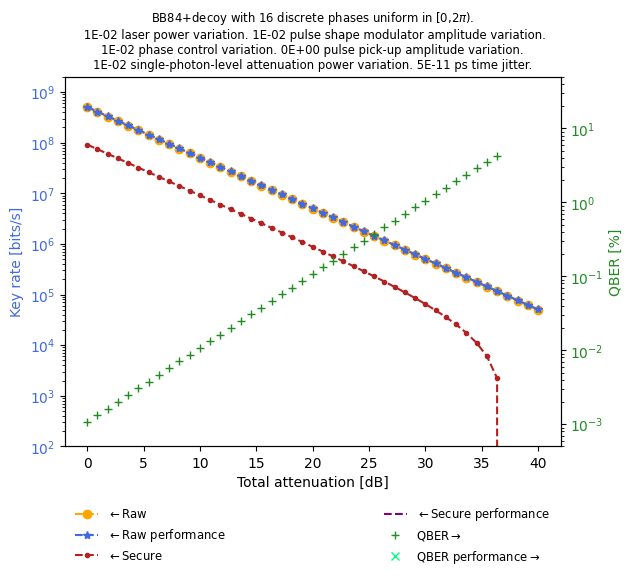

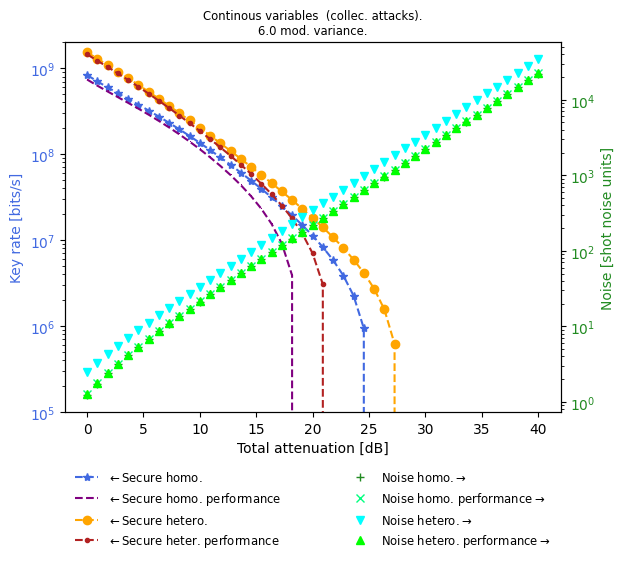

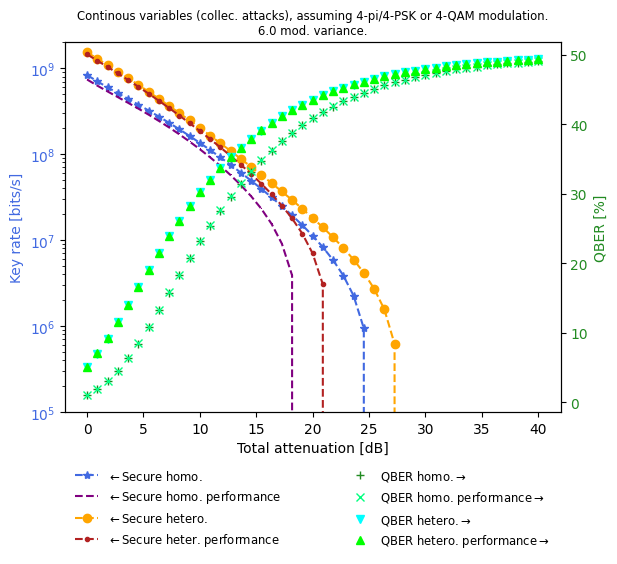

In [ ]:
NumDecoyStates=3 # Actually the protocol proposed to be used is Signal+1decoy-state
NumberMeasurementsAlongAttenuationDistance=45
 
AttenuationdBforDistance=np.linspace(0.0,40.0,NumberMeasurementsAlongAttenuationDistance) # Inside, the algorithms account for some internal losses, primarly on the detector side

DecoyStatesRates=np.zeros((NumDecoyStates),dtype=np.float32)
DecoyStatesRates[0]=0.9#0.9
DecoyStatesRates[1]=0.1#0.09
DecoyStatesRates[2]=1.0-DecoyStatesRates[0]-DecoyStatesRates[1]#0.01 # Actually the protocol proposed to be sued is Signal+1decoy-state
DecoyStatesPhotPulse=np.zeros((NumDecoyStates),dtype=np.float32)
DecoyStatesPhotPulse[0]=5e-1
DecoyStatesPhotPulse[1]=1e-2
DecoyStatesPhotPulse[2]=0.0#1e-3# Eventually 0 # Actually the protocol proposed to be used is Signal+1decoy-state
LaserPower=20e-3 # [W]
SourcePulseRate=2e9
OptPulseDuration=0.2*(1.0/SourcePulseRate)#s
Hplank=6.626e-34#J*s
c0=3e8#m/s
n_fiber=1.5
Wavelength=1550e-9#m
EnergySinglePhoton=Hplank*c0/Wavelength
PhotPulse=(OptPulseDuration*LaserPower)/EnergySinglePhoton
SinglePhotonSourceAttdB=10.0*np.log10(PhotPulse/DecoyStatesPhotPulse[0]) # [dB]
############################################################################
######## DV-QKD
###########################################################################
DVQKDprotocol='BB84+decoy'# 'BB84+decoy', 'SARG04+decoy'
# Detector and system performance
SystemDetectorPerformanceArray=np.zeros((5),dtype=np.float32)
SystemDetectorPerformanceArray[0]=1.0e-5# Y0=Detector darkcount rate per detection window time + stray light that falls in the same wavelength window. 1e-5 # Background yield: detector's dark count rate + other background contributions such as stray light from timing pulses
SystemDetectorPerformanceArray[1]=0.5# e0=0.5 # Error rate of background because it is random.
SystemDetectorPerformanceArray[2]=1.0# transmittanceBob=0.5 # linear. Internal attenuation of optical components at Bob's side.
SystemDetectorPerformanceArray[3]=0.5# attDetectors=0.5 # Detectors efficiency at Bob's side.
SystemDetectorPerformanceArray[4]=50e-12# [s] TimeJitterStd=50e-12 - 300e-12 # [s] # Principally from the single photon detectors. It makes qubits fall in different time slots, hence reducing the raw key rate and increasing the background yield

############################# Laser source ##################################
LaserPowerDeviation=1e-2# Power intensity deviation
LaserPowerVariation=1e-2# Power intensity standard deviation
ConfigurationLaserSource=np.zeros((2),dtype=np.float32)
ConfigurationLaserSource[0]=LaserPowerDeviation # Meant for deviation
ConfigurationLaserSource[1]=LaserPowerVariation # Meant for variation
 
############################ Pulse shaping modulator ##########################
PulseShapeAmplitudeDeviation=1e-1 # Intensity deviation
PulseShapeAmplitudeVariation=1e-2 # Intensity standard deviation
ConfigurationPulseShaping=np.zeros((2),dtype=np.float32)
ConfigurationPulseShaping[0]=PulseShapeAmplitudeDeviation # Meant for deviation
ConfigurationPulseShaping[1]=PulseShapeAmplitudeVariation # Meant for standard variation
 
######################### Phase randomization modulator ####################################
Nphases=16 # A good value is 10 or more (typically 16, also max value allowed in the scripts). In the system 4 bits will be used, hence Nphases=16
PhaseRandomizationVariation=1e-2 # Phase randomization standard deviation
ConfigurationPhases=np.zeros((2),dtype=np.float32)
ConfigurationPhases[0]=float(Nphases)
ConfigurationPhases[1]=PhaseRandomizationVariation # rad. Standard deviation/variation
 
############################# Polarization/phase modulator ##################################
PolarizationSelectionAmplitudeDeviation=np.tan(np.pi/10.0)#1e-2 # Deviation from nominal value (potentially it can account for deviations in polarization or phase states)
PolarizationSelectionAmplitudeVariation=0.0#1e-2 # Standard deviation from nominal value
ConfigurationPolarizationSelection=np.zeros((2),dtype=np.float32)
ConfigurationPolarizationSelection[0]=PolarizationSelectionAmplitudeDeviation # Meant for deviation
ConfigurationPolarizationSelection[1]=PolarizationSelectionAmplitudeVariation # Meant for standard variation
 
############################ Attenuation to single-photon level ##########################
SPlevelPowerAttDeviation=1e-2 # Deviation from nominal value
SPlevelPowerAttVariation=1e-2 # Standard variation from nominal value
ConfigurationSPlevelAtt=np.zeros((2),dtype=np.float32)
ConfigurationSPlevelAtt[0]=SPlevelPowerAttDeviation # Meant for deviation
ConfigurationSPlevelAtt[1]=SPlevelPowerAttVariation # Meant for standard variation
 
###############################################################################
# BB84+decoys state Realistic performance taking into account standard variations and deviations
[att,PrecisionElementsRKRDiscretePhase,PrecisionElementsKeyBitRateLowerBondDiscretePhase,PrecisionElementsQBERDiscretePhase]=PrecisionElementsTransmissionBB84DecoyStateComputeSKRdiscretephase(SourcePulseRate,SinglePhotonSourceAttdB,DecoyStatesRates,DecoyStatesPhotPulse,AttenuationdBforDistance,ConfigurationLaserSource,ConfigurationPulseShaping,ConfigurationPhases,ConfigurationPolarizationSelection,ConfigurationSPlevelAtt,SystemDetectorPerformanceArray,DVQKDprotocol)
[att,RKRDiscretePhase,KeyBitRateLowerBondDiscretePhase,QBERDiscretePhase]=TransmissionBB84DecoyStateComputeSKRdiscretephase(SourcePulseRate,DecoyStatesRates,DecoyStatesPhotPulse,AttenuationdBforDistance,Nphases,SystemDetectorPerformanceArray,DVQKDprotocol)
###############################################################################
 
dBatt=-10*np.log10(att)
 
## Figures
plt.figure()
line1,=plt.plot(dBatt,RKRDiscretePhase,'orange',linestyle='dashed',marker='o')
line2,=plt.plot(dBatt,PrecisionElementsRKRDiscretePhase,'royalblue',linestyle='dashed',marker='*')
line3,=plt.plot(dBatt,KeyBitRateLowerBondDiscretePhase,'firebrick',linestyle='dashed',marker='.')
line4,=plt.plot(dBatt,PrecisionElementsKeyBitRateLowerBondDiscretePhase,'purple',linestyle='dashed',marker=',')
#plt.legend(loc='upper center')
#plt.xscale('log')
plt.ylim(np.max([1e2,KeyBitRateLowerBondDiscretePhase[-1],PrecisionElementsKeyBitRateLowerBondDiscretePhase[-1]]),SourcePulseRate)
plt.yscale('log')
plt.xlabel('Total attenuation [dB]',color='k')
plt.ylabel('Key rate [bits/s]',color='royalblue')
plt.tick_params(axis="y", labelcolor='royalblue')
plt.twinx()
line5,=plt.plot(dBatt,100.0*QBERDiscretePhase,'forestgreen',linestyle='None',marker='+')
line6,=plt.plot(dBatt,100.0*PrecisionElementsQBERDiscretePhase,'springgreen',linestyle='None',marker='x')
plt.yscale('log')
plt.ylim(np.max([5e-4,np.min([100.0*QBERDiscretePhase[0],100.0*PrecisionElementsQBERDiscretePhase[0]])]),5e1)
plt.tick_params(axis="y", labelcolor='forestgreen')
plt.ylabel('QBER [%]', color='forestgreen')
plt.legend((line1, line2, line3, line4, line5, line6), (r'$\leftarrow$'+'Raw',r'$\leftarrow$'+'Raw performance',r'$\leftarrow$'+'Secure',r'$\leftarrow$'+'Secure performance', 'QBER'+r'$\rightarrow$', 'QBER performance'+r'$\rightarrow$'),bbox_to_anchor=(0, -0.35, 1, 0), loc="lower left", mode="expand", ncol=2,shadow = False, fancybox = False, frameon = False, fontsize='small')# 'best'
plt.title(DVQKDprotocol+' with '+str(Nphases)+' discrete phases uniform in [$0$,$2\pi$).\n '+str("{:.0E}".format(LaserPowerVariation))+' laser power variation. '+str("{:.0E}".format(PulseShapeAmplitudeVariation))+' pulse shape modulator amplitude variation.\n'+str("{:.0E}".format(PhaseRandomizationVariation))+' phase control variation. '+str("{:.0E}".format(PolarizationSelectionAmplitudeVariation))+' pulse pick-up amplitude variation.\n'+str("{:.0E}".format(SPlevelPowerAttVariation))+' single-photon-level attenuation power variation. '+str("{:.0E}".format(SystemDetectorPerformanceArray[4]))+r' ps'+' time jitter.', fontsize='small')
plt.savefig('FigTheoreticalBB84decoySKRqber.png', format = 'png', dpi = 600 )
plt.show()
################################################################################
## BB84+decoys state Model system/protocol without taking into account variations and deviations
#[att,RKRContinuousPhase,KeyBitRateLowerBondContinuousPhase,QBERContinuousPhase]=TransmissionBB84DecoyStateComputeSKRcontinuousphase.TransmissionBB84DecoyStateComputeSKRcontinuousphase(SourcePulseRate,DecoyStatesRates,DecoyStatesPhotPulse,AttenuationdBforDistance,SystemDetectorPerformanceArray,DVQKDprotocol)
#[att,RKRDiscretePhase,KeyBitRateLowerBondDiscretePhase,QBERDiscretePhase]=TransmissionBB84DecoyStateComputeSKRdiscretephase.TransmissionBB84DecoyStateComputeSKRdiscretephase(SourcePulseRate,DecoyStatesRates,DecoyStatesPhotPulse,AttenuationdBforDistance,Nphases,SystemDetectorPerformanceArray,DVQKDprotocol)
################################################################################
#
#dBatt=-10*np.log10(att)
# 
## Figures
#plt.figure()
#line1,=plt.plot(dBatt,RKRContinuousPhase,'orange',linestyle='dashed',marker='o')
#line2,=plt.plot(dBatt,RKRDiscretePhase,'royalblue',linestyle='dashed',marker='*')
#line3,=plt.plot(dBatt,KeyBitRateLowerBondContinuousPhase,'firebrick',linestyle='dashed',marker='.')
#line4,=plt.plot(dBatt,KeyBitRateLowerBondDiscretePhase,'purple',linestyle='dashed',marker=',')
##plt.legend(loc='upper center')
##plt.xscale('log')
#plt.ylim(np.max([1e2,KeyBitRateLowerBondContinuousPhase[-1]]),SourcePulseRate)
#plt.yscale('log')
#plt.xlabel('Total attenuation [dB]',color='k')
#plt.ylabel('Key rate [bits/s]',color='royalblue')
#plt.tick_params(axis="y", labelcolor='royalblue')
#plt.twinx()
#line5,=plt.plot(dBatt,100.0*QBERContinuousPhase,'forestgreen',linestyle='None',marker='+')
#line6,=plt.plot(dBatt,100.0*QBERDiscretePhase,'springgreen',linestyle='None',marker='x')
#plt.yscale('log')
#plt.ylim(np.max([5e-4,np.min([100.0*QBERContinuousPhase[0],100.0*QBERDiscretePhase[0]])]),5e1)
#plt.tick_params(axis="y", labelcolor='forestgreen')
#plt.ylabel('QBER [%]', color='forestgreen')
#plt.legend((line1, line2, line3, line4, line5, line6), (r'$\leftarrow$'+'Raw (continuous phase)',r'$\leftarrow$'+'Raw (discrete phase)',r'$\leftarrow$'+'Secure (continuous phase)',r'$\leftarrow$'+'Secure (discrete phase)', 'QBER (continuous phase)'+r'$\rightarrow$','QBER (discrete phase)'+r'$\rightarrow$'),bbox_to_anchor=(0, -0.5, 1, 0), loc="lower left", mode="expand", ncol=2,shadow = False, fancybox = False, frameon = False, fontsize='small')# 'best'
#plt.title(DVQKDprotocol+' N discrete phases uniform in [$0$,$2\pi$), N = '+str(Nphases), fontsize='small')
#plt.show()

###############################################################################
# Continuous variables
##############################################################################
############################################################################
# Detector and system performance
SystemDetectorPerformanceArray=np.zeros((26),dtype=np.float32)
SystemDetectorPerformanceArray[0]=6.0 # modulation variance >1.0. It is important to optimize this value. Experimental study on discretely modulated continuous-variable quantum key distribution
SystemDetectorPerformanceArray[1]=0.5# transmittanceBob # linear. Internal attenuation of optical components at Bob's side (at least the homodyne detection beamsplitter). At least de beamsplitter for homodyne/heterodyne
SystemDetectorPerformanceArray[2]=0.9# Detectors efficiency at Bob's side
SystemDetectorPerformanceArray[3]=8e-15 # Relative intensity noise of the signal laser [Hz**-1]
SystemDetectorPerformanceArray[4]=SourcePulseRate
SystemDetectorPerformanceArray[5]=1.4e-12 # Relative intensity noise of the local oscilator [Hz**-1]
SystemDetectorPerformanceArray[6]=1e-8 # Variance of quadratures without taking the local oscillators's RIN into account [V**2]
SystemDetectorPerformanceArray[7]=1.0 # Electric gain driving the modulators [V]
SystemDetectorPerformanceArray[8]=0.85 #Responsitivity of the PIN diodes [A/W]
SystemDetectorPerformanceArray[9]=0.01 # Relative voltage deviation of the DAC
SystemDetectorPerformanceArray[10]=1.5 # Upi: voltage required to achieve a phase rotation of π
SystemDetectorPerformanceArray[11]=SystemDetectorPerformanceArray[10]/SystemDetectorPerformanceArray[7] # UDAC=Upi/g
SystemDetectorPerformanceArray[12]=5.0 #Variance of the pilot tone [SNU]. Has to be higher or equal than 1.0. Directly related to phase noise, in particular in local local oscilaltor
SystemDetectorPerformanceArray[13]=8.0 # It is common to sample several, say N pilot-tone measurements
SystemDetectorPerformanceArray[14]=600.0 # Variance of the pilot tone [SNU], related to the mean photon number. Has to be higher or equal than 1.0. The higher the better.
SystemDetectorPerformanceArray[15]=8e-12 #Spectral filter bandwidth [m]
SystemDetectorPerformanceArray[16]=-75.0 # Spectral Raman noise density [dBm/nm]
SystemDetectorPerformanceArray[17]=OptPulseDuration # Pulse duration [s]
SystemDetectorPerformanceArray[18]=c0/(n_fiber*Wavelength) #Optical frequency [Hz]
SystemDetectorPerformanceArray[19]=10000.0 # Common-mode rejection ratio homodyne
SystemDetectorPerformanceArray[20]=1e-2 # local oscillator power [W]. Up to some point the higher the better
SystemDetectorPerformanceArray[21]=4.5e-18 # Noise equivalent power of the detector. Key factor for high speed transmissions
SystemDetectorPerformanceArray[22]=10.0 # Bit resolution of the ADC
SystemDetectorPerformanceArray[23]=1.0 # Dynamic voltage range of the ADC [V]
SystemDetectorPerformanceArray[24]=1e-8 # Intrinsic voltage variance of the ADC [V**2]
SystemDetectorPerformanceArray[25]=20e3# Electric amplification for detector ADC [Ohms]

AttenuationdBforDistance=np.linspace(0.0,40.0,NumberMeasurementsAlongAttenuationDistance) # Inside, the algorithms account for some internal losses, primarly on the detector side

# Continous variables Realistic performance taking into account variations and deviations
[att,PrecisionElementsKeyBitRateLowerBondContinousVariablesHomoDyne,PrecisionElementsKeyBitRateLowerBondContinousVariablesHeteroDyne,PrecisionElementsNoiseContinousVariablesHomodyne,PrecisionElementsNoiseContinousVariablesHeterodyne,PrecisionElementsQBERHomodyneContinousVariables,PrecisionElementsQBERHeterodyneContinousVariables]=PrecisionElementsTransmissionContinousVariablesComputeSKR(SourcePulseRate,SinglePhotonSourceAttdB,AttenuationdBforDistance,SystemDetectorPerformanceArray)
[att,KeyBitRateLowerBondContinousVariablesHomoDyne,KeyBitRateLowerBondContinousVariablesHeteroDyne,NoiseContinousVariablesHomodyne,NoiseContinousVariablesHeterodyne,QBERHomodyneContinousVariables,QBERHeterodyneContinousVariables]=TransmissionContinuousVariablesComputeSKR(SourcePulseRate,AttenuationdBforDistance,SystemDetectorPerformanceArray)
###############################################################################
 
dBatt=-10*np.log10(att)

## Figures
plt.figure()
line1,=plt.plot(dBatt,KeyBitRateLowerBondContinousVariablesHomoDyne,'royalblue',linestyle='dashed',marker='*')
line2,=plt.plot(dBatt,PrecisionElementsKeyBitRateLowerBondContinousVariablesHomoDyne,'purple',linestyle='dashed',marker=',')
line3,=plt.plot(dBatt,KeyBitRateLowerBondContinousVariablesHeteroDyne,'orange',linestyle='dashed',marker='o')
line4,=plt.plot(dBatt,PrecisionElementsKeyBitRateLowerBondContinousVariablesHeteroDyne,'firebrick',linestyle='dashed',marker='.')
#plt.legend(loc='upper center')
#plt.xscale('log')
plt.yscale('log')
plt.ylim(np.max([1e5,KeyBitRateLowerBondContinousVariablesHomoDyne[-1],PrecisionElementsKeyBitRateLowerBondContinousVariablesHomoDyne[-1],KeyBitRateLowerBondContinousVariablesHeteroDyne[-1],PrecisionElementsKeyBitRateLowerBondContinousVariablesHeteroDyne[-1]]),SourcePulseRate)
plt.xlabel('Total attenuation [dB]',color='k')
plt.ylabel('Key rate [bits/s]',color='royalblue')
plt.tick_params(axis="y", labelcolor='royalblue')
plt.twinx()
line5,=plt.plot(dBatt,NoiseContinousVariablesHomodyne,'forestgreen',linestyle='None',marker='+')
line6,=plt.plot(dBatt,PrecisionElementsNoiseContinousVariablesHomodyne,'springgreen',linestyle='None',marker='x')
line7,=plt.plot(dBatt,NoiseContinousVariablesHeterodyne,'cyan',linestyle='None',marker='v')
line8,=plt.plot(dBatt,PrecisionElementsNoiseContinousVariablesHeterodyne,'lime',linestyle='None',marker='^')
plt.yscale('log')
#plt.ylim(np.max([5e-4,np.min([100.0*NoiseContinousVariables[0],100.0*PrecisionElementsNoiseContinousVariables[0]])]),1e2)
plt.tick_params(axis="y", labelcolor='forestgreen')
plt.ylabel('Noise [shot noise units]', color='forestgreen')
plt.legend((line1, line2, line3, line4, line5, line6, line7, line8), (r'$\leftarrow$'+'Secure homo.',r'$\leftarrow$'+'Secure homo. performance',r'$\leftarrow$'+'Secure hetero.',r'$\leftarrow$'+'Secure heter. performance', 'Noise homo.'+r'$\rightarrow$', 'Noise homo. performance'+r'$\rightarrow$', 'Noise hetero.'+r'$\rightarrow$', 'Noise hetero. performance'+r'$\rightarrow$'),bbox_to_anchor=(0, -0.4, 1, 0), loc="lower left", mode="expand", ncol=2,shadow = False, fancybox = False, frameon = False, fontsize='small')# 'best'
plt.title('Continous variables  (collec. attacks).\n'+str("{:.1f}".format(SystemDetectorPerformanceArray[0]))+' mod. variance.', fontsize='small')
#plt.savefig('FigTheoreticalCVSKRnoise.png', format = 'png', dpi = 600 )
plt.show()

## Figures
plt.figure()
line1,=plt.plot(dBatt,KeyBitRateLowerBondContinousVariablesHomoDyne,'royalblue',linestyle='dashed',marker='*')
line2,=plt.plot(dBatt,PrecisionElementsKeyBitRateLowerBondContinousVariablesHomoDyne,'purple',linestyle='dashed',marker=',')
line3,=plt.plot(dBatt,KeyBitRateLowerBondContinousVariablesHeteroDyne,'orange',linestyle='dashed',marker='o')
line4,=plt.plot(dBatt,PrecisionElementsKeyBitRateLowerBondContinousVariablesHeteroDyne,'firebrick',linestyle='dashed',marker='.')
#plt.legend(loc='upper center')
#plt.xscale('log')
plt.yscale('log')
plt.ylim(np.max([1e5,KeyBitRateLowerBondContinousVariablesHomoDyne[-1],PrecisionElementsKeyBitRateLowerBondContinousVariablesHomoDyne[-1],KeyBitRateLowerBondContinousVariablesHeteroDyne[-1],PrecisionElementsKeyBitRateLowerBondContinousVariablesHeteroDyne[-1]]),SourcePulseRate)
plt.xlabel('Total attenuation [dB]',color='k')
plt.ylabel('Key rate [bits/s]',color='royalblue')
plt.tick_params(axis="y", labelcolor='royalblue')
plt.twinx()
line5,=plt.plot(dBatt,100.0*QBERHomodyneContinousVariables,'forestgreen',linestyle='None',marker='+')
line6,=plt.plot(dBatt,100.0*PrecisionElementsQBERHomodyneContinousVariables,'springgreen',linestyle='None',marker='x')
line7,=plt.plot(dBatt,100.0*QBERHeterodyneContinousVariables,'cyan',linestyle='None',marker='v')
line8,=plt.plot(dBatt,100.0*PrecisionElementsQBERHeterodyneContinousVariables,'lime',linestyle='None',marker='^')
#plt.yscale('log')
#plt.ylim(np.max([5e-4,np.min([100.0*PrecisionElementsQBERHomodyneContinousVariables[0],100.0*PrecisionElementsQBERHeterodyneContinousVariables[0],100.0*QBERHomodyneContinousVariables[0],100.0*QBERHeterodyneContinousVariables[0]])]),5e1)
plt.tick_params(axis="y", labelcolor='forestgreen')
plt.ylabel('QBER [%]', color='forestgreen')
plt.legend((line1, line2, line3, line4, line5, line6, line7, line8), (r'$\leftarrow$'+'Secure homo.',r'$\leftarrow$'+'Secure homo. performance',r'$\leftarrow$'+'Secure hetero.',r'$\leftarrow$'+'Secure heter. performance', 'QBER homo.'+r'$\rightarrow$', 'QBER homo. performance'+r'$\rightarrow$', 'QBER hetero.'+r'$\rightarrow$', 'QBER hetero. performance'+r'$\rightarrow$'),bbox_to_anchor=(0, -0.4, 1, 0), loc="lower left", mode="expand", ncol=2,shadow = False, fancybox = False, frameon = False, fontsize='small')# 'best'
plt.title('Continous variables (collec. attacks), assuming 4-pi/4-PSK or 4-QAM modulation.\n'+str("{:.1f}".format(SystemDetectorPerformanceArray[0]))+' mod. variance.', fontsize='small')
#plt.savefig('FigTheoreticalCVSKRqber.png', format = 'png', dpi = 600 )
plt.show()

# Bell State MEasurements (prior to Teleportation)



{'11': 270, '00': 262, '10': 254, '01': 238}


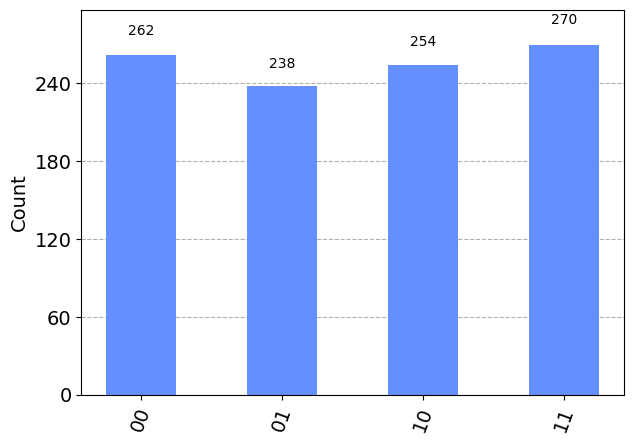

In [15]:
#######################################################################
# Example of Bell state Measurement - Measurement in the different Bell state bases
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
from qiskit.visualization import plot_histogram
NumberShots=1024
# Create a quantum circuit with two qubits and two classical bits
qr=QuantumRegister(2,'q')
cr=ClassicalRegister(2,'c')
qc=QuantumCircuit(qr,cr)

UseBellState=False

if (UseBellState):
  state = Statevector([1.0/np.sqrt(2),0.0,0.0,1.0/np.sqrt(2)]) # In the computational base. Bell state
else:
  state = Statevector([1.0/np.sqrt(2),1.0/np.sqrt(2),0.0,0.0]) # In the computational base. Non Bell state

qc.initialize(state.data, [0,1]) # Initialize both qubits at the same time

def BSM_gates(qc, psi, a):
  qc.cx(psi, a)
  qc.h(psi)

# Add the Measurement State Measurement gates (equivalent to a beamsplitter and polarization beamsplitters)
BSM_gates(qc, 0, 1)

def measure_BSM(qc, a, b):
  qc.measure(a,0)
  qc.measure(b,1)

measure_BSM(qc, 0 ,1)

backend=Aer.get_backend('qasm_simulator')
job=execute(qc,backend,shots=NumberShots)
result=job.result()
# Print the results
counts=result.get_counts(qc)
print(counts)
display(plot_histogram(counts))

# Quantum teleportation

## Contents

1. [Overview](#overview)    
2. [The Quantum Teleportation Protocol](#how)       
3. [Simulating the Teleportation Protocol](#simulating)   
    3.1 [How will we Test this Result on an ideal experiment?](#testing)
4. [Teleportation result on a real experiment](#real_qc)



## 1. Overview <a id='overview'></a>

Alice wants to send quantum information to Bob. Specifically, suppose she wants to send the qubit state
$\vert\psi\rangle = \alpha\vert0\rangle + \beta\vert1\rangle$. 
This entails passing on information about $\alpha$ and $\beta$ to Bob.

There exists a theorem in quantum mechanics which states that you cannot simply make an exact copy of an unknown quantum state. This is known as the no-cloning theorem. As a result of this we can see that Alice can't simply generate a copy of $\vert\psi\rangle$ and give the copy to Bob. We can only copy classical states (not superpositions).

However, by taking advantage of two classical bits and an entangled qubit pair, Alice can transfer her state $\vert\psi\rangle$ to Bob. We call this teleportation because, at the end, Bob will have $\vert\psi\rangle$ and Alice won't anymore.

## 2. The Quantum Teleportation Protocol <a id='how'></a>
To transfer a quantum bit, Alice and Bob must use a third party (Telamon) to send them an entangled qubit pair. Alice then performs some operations on her qubit, sends the results to Bob over a classical communication channel, and Bob then performs some operations on his end to receive Alice’s qubit.

We will describe the steps on a quantum circuit below. Here, no qubits are actually ‘sent’, you’ll just have to imagine that part!

First we set up our session:

#### Step 1
A third party, Telamon, creates an entangled pair of qubits and gives one to Bob and one to Alice.

The pair Telamon creates is a special pair called a Bell pair. In quantum circuit language, the way to create a Bell pair between two qubits is to first transfer one of them to the X-basis ($|+\rangle$ and $|-\rangle$) using a Hadamard gate, and then to apply a CNOT gate onto the other qubit controlled by the one in the X-basis.

Let's say Alice owns $q_1$ and Bob owns $q_2$ after they part ways.

#### Step 2 

Alice applies a CNOT gate to $q_1$, controlled by $\vert\psi\rangle$ (the qubit she is trying to send Bob). Then Alice applies a Hadamard gate to $|\psi\rangle$. In our quantum circuit, the qubit ($|\psi\rangle$) Alice is trying to send is $q_0$.

#### Step 3

Next, Alice applies a measurement to both qubits that she owns, $q_1$ and $\vert\psi\rangle$, and stores this result in two classical bits. She then sends these two bits to Bob.

#### Step 4

Bob, who already has the qubit $q_2$, then applies the following gates depending on the state of the classical bits:

00 $\rightarrow$ Do nothing

01 $\rightarrow$ Apply $X$ gate

10 $\rightarrow$ Apply $Z$ gate

11 $\rightarrow$ Apply $ZX$ gate

(*Note that this transfer of information is purely classical*.)

In [91]:
# Do the necessary imports
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
#from qiskit.ignis.verification import marginal_counts
from qiskit.result import marginal_counts
from qiskit.quantum_info import random_statevector

## SETUP
# Protocol uses 3 qubits and 2 classical bits in 2 different registers

def create_bell_pair(qc, a, b):
  """Creates a bell pair in qc using qubits a & b"""
  qc.h(a) # Put qubit a into state |+>
  qc.cx(a,b) # CNOT with a as control and b as target
## SETUP
# Protocol uses 3 qubits and 2 classical bits in 2 different registers
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

## STEP 1
# In our case, Telamon entangles qubits q1 and q2
# Let's apply this to our circuit:
create_bell_pair(teleportation_circuit, 1, 2)
# And view the circuit so far:
#display(teleportation_circuit.draw())

def alice_gates(qc, psi, a):
  qc.cx(psi, a)
  qc.h(psi)

## STEP 2
teleportation_circuit.barrier() # Use barrier to separate steps
alice_gates(teleportation_circuit, 0, 1)
#display(teleportation_circuit.draw())

def measure_and_send(qc, a, b):
  """Measures qubits a & b and 'sends' the results to Bob"""
  qc.barrier()
  qc.measure(a,0)
  qc.measure(b,1)

## STEP 3
measure_and_send(teleportation_circuit, 0 ,1)
#display(teleportation_circuit.draw())

# This function takes a QuantumCircuit (qc), integer (qubit)
# and ClassicalRegisters (crz & crx) to decide which gates to apply
def bob_gates(qc, qubit, crz, crx):
  # Here we use c_if to control our gates with a classical
  # bit instead of a qubit
  qc.x(qubit).c_if(crx, 1) # Apply gates if the registers 
  qc.z(qubit).c_if(crz, 1) # are in the state '1'

## STEP 4
teleportation_circuit.barrier() # Use barrier to separate steps
bob_gates(teleportation_circuit, 2, crz, crx)
#display(teleportation_circuit.draw())

# And voila! At the end of this protocol, Alice's qubit has now teleported to Bob.

## 3. Simulating the Teleportation Protocol <a id='simulating'></a>

In this notebook, we will initialize Alice's qubit in a random state $\vert\psi\rangle$ (`psi`). In this section we use the function `random_statevector` to choose `psi` for us, but feel free to set `psi` to any qubit state you want.


<IPython.core.display.Latex object>

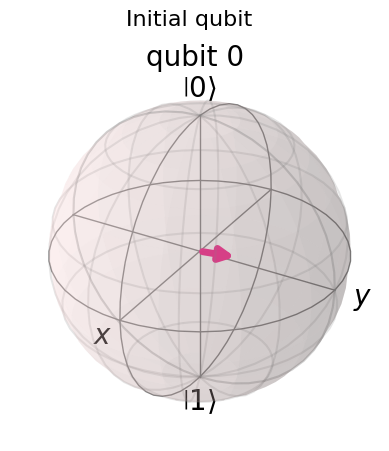

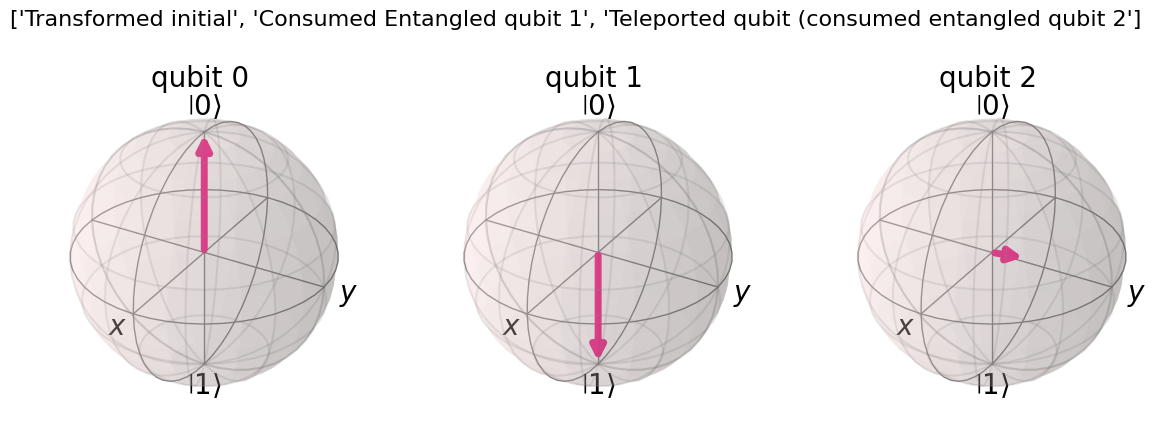

In [92]:
# Create a random qubit state
psi = random_statevector(2)

# Display it nicely
display(array_to_latex(psi, prefix="|\\psi\\rangle ="))
# Show it on a Bloch sphere
display(plot_bloch_multivector(psi,title='Initial qubit'))

# Let's create our initialization instruction to create |ψ⟩ from the state |0⟩:
init_gate = Initialize(psi)
init_gate.label = "init"

## SETUP
qr = QuantumRegister(3, name="q")   # Protocol uses 3 qubits
crz = ClassicalRegister(1, name="crz") # and 2 classical registers
crx = ClassicalRegister(1, name="crx")
qc = QuantumCircuit(qr, crz, crx)

## STEP 0
# First, let's initialize Alice's q0
qc.append(init_gate, [0])
qc.barrier()

## STEP 1
# Now begins the teleportation protocol
create_bell_pair(qc, 1, 2)
qc.barrier()

## STEP 2
# Send q1 to Alice and q2 to Bob
alice_gates(qc, 0, 1)

## STEP 3
# Alice then sends her classical bits to Bob
measure_and_send(qc, 0, 1)

## STEP 4
# Bob decodes qubits
bob_gates(qc, 2, crz, crx)

# Display the circuit
#display(qc.draw())

# We can see below, using the statevector obtained from the aer simulator, that the state of |q2⟩  is the same as the state |ψ⟩  we created above, while the states of  |q0⟩  and  |q1⟩  have been collapsed to either  |0⟩  or  |1⟩ . The state  |ψ⟩  has been teleported from qubit 0 to qubit 2.
sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
out_vector = sim.run(qc).result().get_statevector()
display(plot_bloch_multivector(out_vector,title=['Transformed initial','Consumed Entangled qubit 1','Teleported qubit (consumed entangled qubit 2']))

# You can run this cell a few times to make sure. You may notice that the qubits 0 & 1 change states, but qubit 2 is always in the state |ψ⟩.


## 3.1 How will we Test this Result on an ideal experiment? <a id='testing'></a>

On a real experiment, we would not be able to sample the statevector, so if we wanted to check our teleportation system is working, we need to do things slightly differently.

We would compare the outcomes of the initial state with the outcomes of the teleported state, by measuring the Fidelity.

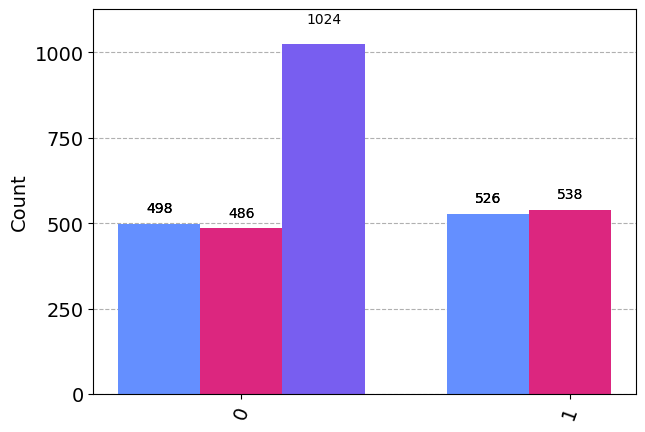

The experimental error rate is: 0.000%
Theoretical Fidelity: 100.00 [%]


In [93]:
#############################################################################
# Check that the state teleported at the output is the same as at the beggining
inverse_init_gate = init_gate.gates_to_uncompute()

## SETUP
qr = QuantumRegister(3, name="q")   # Protocol uses 3 qubits
crz = ClassicalRegister(1, name="crz") # and 2 classical registers
crx = ClassicalRegister(1, name="crx")
qc = QuantumCircuit(qr, crz, crx)

## STEP 0
# First, let's initialize Alice's q0
qc.append(init_gate, [0])
qc.barrier()

## STEP 1
# Now begins the teleportation protocol
create_bell_pair(qc, 1, 2)
qc.barrier()

## STEP 2
# Send q1 to Alice and q2 to Bob
alice_gates(qc, 0, 1)

## STEP 3
# Alice then sends her classical bits to Bob
measure_and_send(qc, 0, 1)

## STEP 4
# Bob decodes qubits
bob_gates(qc, 2, crz, crx)

## STEP 5
# reverse the initialization process
qc.append(inverse_init_gate, [2])

# We can see the inverse_init_gate appearing, labelled 'disentangler' on the circuit diagram. Finally, we measure the third qubit and store the result in the third classical bit:
# Need to add a new ClassicalRegister
# to see the result
cr_result = ClassicalRegister(1)
qc.add_register(cr_result)
qc.measure(2,2)
#qc.draw()

# and we run our experiment:
t_qc = transpile(qc, sim)
t_qc.save_statevector()
counts = sim.run(t_qc).result().get_counts()
qubit_counts = [marginal_counts(counts, [qubit]) for qubit in range(3)]
display(plot_histogram(qubit_counts))

# We can see we have a 100% chance of measuring q2 (the purple bar in the histogram) in the state |0⟩. This is the expected result, and indicates the teleportation protocol has worked properly.
print(f"The experimental error rate is: {0.0:.3f}%")

ExpError=0.0/marginal_counts(counts, [2])['0']
Ftheor=1.0-ExpError*0.5
print(f'Theoretical Fidelity: {Ftheor*100.0:.2f} [%]')

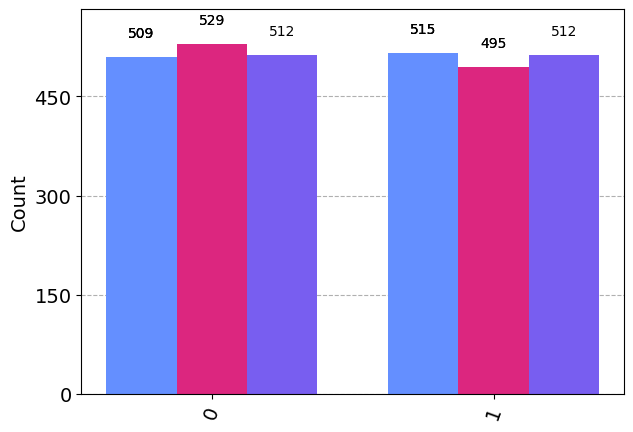

The experimental error rate is: 50.000%
Theoretical Fidelity: 75.00 [%]


In [88]:
# Check that if Bob choses at random which unitary transformation, then the state is not correctly teleported
## SETUP
qr = QuantumRegister(5, name="q")   # Protocol uses 3+2 qubits
crz = ClassicalRegister(1, name="crz") # and 2 classical registers
crx = ClassicalRegister(1, name="crx")
crzRandom = ClassicalRegister(1, name="crzRandom") # and 2 classical registers
crxRandom = ClassicalRegister(1, name="crxRandom")
qc = QuantumCircuit(qr, crz, crx, crzRandom, crxRandom)

## STEP 0
# First, let's initialize Alice's q0
qc.append(init_gate, [0])
qc.barrier()

## STEP 1
# Now begins the teleportation protocol
create_bell_pair(qc, 1, 2)
qc.barrier()

## STEP 2
# Send q1 to Alice and q2 to Bob
alice_gates(qc, 0, 1)

## STEP 3
# Alice then sends her classical bits to Bob
measure_and_send(qc, 0, 1)

## STEP 4
# We choose at random the classical bits information - or equivalently, Bob does not wait Alice information
# For that we create a new quantum circuit

qc.h(3) # Superposition for qubit 4
qc.h(4) # Superposition for qubit 5
qc.measure(3,crzRandom)
qc.measure(4,crxRandom)
# Initialize the classical register to a random value
qc.barrier()

# Bob decodes qubits
bob_gates(qc, 2, crzRandom, crxRandom)

## STEP 5
# reverse the initialization process
qc.append(inverse_init_gate, [2])

# We can see the inverse_init_gate appearing, labelled 'disentangler' on the circuit diagram. Finally, we measure the third qubit and store the result in the third classical bit:
# Need to add a new ClassicalRegister
# to see the result
cr_result = ClassicalRegister(1)
qc.add_register(cr_result)
qc.measure(2,2)
#qc.draw()

# and we run our experiment:
t_qc = transpile(qc, sim)
t_qc.save_statevector()
counts = sim.run(t_qc).result().get_counts()
qubit_counts = [marginal_counts(counts, [qubit]) for qubit in range(3)]
display(plot_histogram(qubit_counts))
#print(qubit_counts[2])

print(f"The experimental error rate is: {qubit_counts[2]['1']*100/sum(qubit_counts[2].values()):.3f}%")

ExpError=marginal_counts(counts, [2])['1']/(marginal_counts(counts, [2])['0']+marginal_counts(counts, [2])['1'])
Ftheor=1.0-ExpError*0.5
print(f'Theoretical Fidelity: {Ftheor*100.0:.2f} [%]')


## 4. Teleportation result on a real experiment <a id='real_qc'></a>

Job Status: job has successfully run


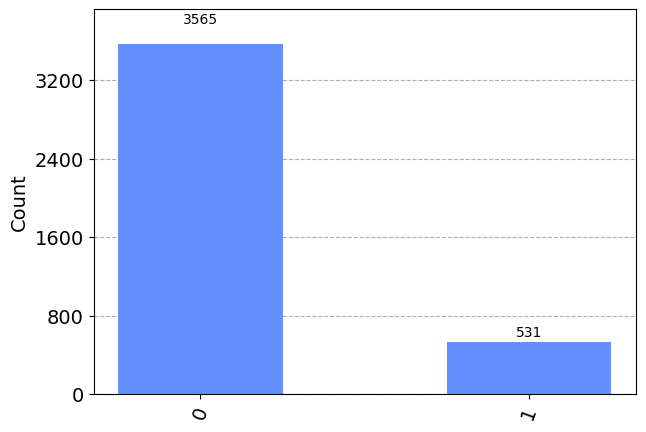

The experimental error rate is: 12.964%
Theoretical Fidelity: 93.52 [%]
State Fidelity: 93.38 [%]


In [87]:
from qiskit.quantum_info import state_fidelity, Statevector, partial_trace
from qiskit.tools.monitor import job_monitor
import qiskit_aer.noise as noise

NumberShots=int(4096)

def new_bob_gates(qc, a, b, c):
  qc.cx(b, c)
  qc.cz(a, c)

qc = QuantumCircuit(3,1)

# First, let's initialize Alice's q0
qc.append(init_gate, [0])
qc.save_statevector(label='v1', pershot = True)

qc.barrier()

# Now begins the teleportation protocol
create_bell_pair(qc, 1, 2)
qc.barrier()
# Send q1 to Alice and q2 to Bob
alice_gates(qc, 0, 1)
qc.barrier()
# Alice sends classical bits to Bob
new_bob_gates(qc, 0, 1, 2)
qc.save_statevector(label='v2', pershot = True)
# We undo the initialization process
qc.append(inverse_init_gate, [2])

# See the results, we only care about the state of qubit 2
qc.measure(2,0)

# View the results:
#qc.draw()

# First, see what devices we are allowed to use by loading our saved accounts
#IBMQ.load_account()
#provider = IBMQ.get_provider(hub='ibm-q')

# Error probabilities
prob_1 = 0.1  # 1-qubit gate
prob_2 = prob_1  # 2-qubit gate

# Depolarizing quantum errors
error_1 = noise.depolarizing_error(prob_1, 1)
error_2 = noise.depolarizing_error(prob_2, 2)

# Add errors to noise model
noise_model = noise.NoiseModel()
noise_model.add_all_qubit_quantum_error(error_1, ['rz', 'sx', 'x'])
noise_model.add_all_qubit_quantum_error(error_2, ['cx'])
#print(noise_model)

# get the least-busy backend at IBM and run the quantum circuit there
#from qiskit.providers.ibmq import least_busy
#from qiskit.providers.aer.noise import NoiseModel

#backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 3 and not b.configuration().simulator and b.status().operational==True))
backend = Aer.get_backend('qasm_simulator')
# Define a noise model
#noise_model = NoiseModel.from_backend(backend)
t_qc = transpile(qc, backend, optimization_level=3)
job = backend.run(t_qc,noise_model=noise_model,shots=NumberShots)
job_monitor(job)  # displays job status under cell

# Get the results and display them
exp_result = job.result()
exp_counts = exp_result.get_counts(qc)
#print(exp_counts)
display(plot_histogram(exp_counts))

print(f"The experimental error rate is: {exp_counts['1']*100/sum(exp_counts.values()):.3f}%")
# As we see here, there are a few results in which we measured |1⟩ . These arise due to errors in the gates and the qubits. In contrast, our simulator in the earlier part of the notebook had zero errors in its gates, and allowed error-free teleportation.
result=job.result()

AvgStateFidelity=0.0
for iIter in range(0,int(NumberShots),1):
  # https://quantumcomputing.stackexchange.com/questions/15110/get-state-vector-of-a-single-qubit-in-a-circuit-in-qiskit
  sv1Full = result.data(0)['v1'][iIter]
  # get the density matrix for the first qubit by taking the partial trace
  sv1_partial_density_matrix = partial_trace(sv1Full, [1, 2])
  # extract the statevector out of the density matrix
  sv1_partial_statevector = np.diagonal(sv1_partial_density_matrix)
  # Normalization
  sv1_partial_statevector=sv1_partial_statevector/np.sqrt(np.abs(sv1_partial_statevector[0])**2+np.abs(sv1_partial_statevector[1])**2)
  
  sv2Full = result.data(0)['v2'][iIter]
  # get the density matrix for the first qubit by taking the partial trace
  sv2_partial_density_matrix = partial_trace(sv2Full, [0, 1])
  # extract the statevector out of the density matrix
  sv2_partial_statevector = np.diagonal(sv2_partial_density_matrix)
  # Normalization
  sv2_partial_statevector=sv2_partial_statevector/np.sqrt(np.abs(sv2_partial_statevector[0])**2+np.abs(sv2_partial_statevector[1])**2)

  AvgStateFidelity+=state_fidelity(sv1_partial_statevector, sv2_partial_statevector)
AvgStateFidelity=AvgStateFidelity/float(NumberShots)

ExpError=exp_counts['1']/sum(exp_counts.values())
Ftheor=1.0-ExpError*0.5
print(f'Theoretical Fidelity: {Ftheor*100.0:.2f} [%]')
print(f'State Fidelity: {(AvgStateFidelity*100.0):.2f} [%]')

# Wrap-up of Probability errors and Fidelity

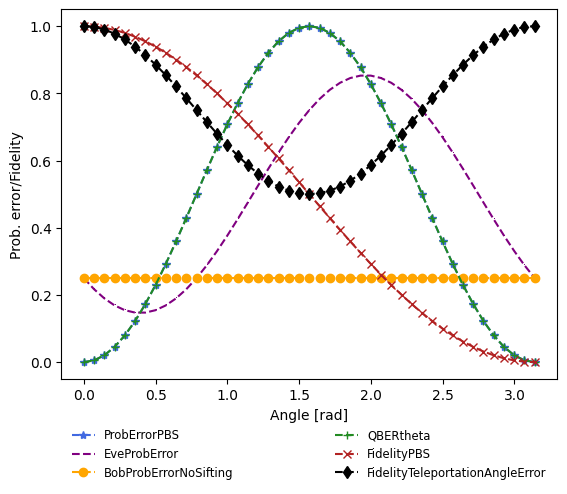

In [85]:
##############################################################################
# Relation of Probability errors, QBER, Fidelities with the the rotation of the measurement basis \theta
NcalcAngle=45
MaxAngle=np.pi
AnglesScan=np.linspace(0,MaxAngle,NcalcAngle)

ProbErrorPBS=1.0-np.cos(AnglesScan)**2
EveProbError=0.25*((1.0-np.cos(2.0*AnglesScan))+(1.0-np.sin(2.0*AnglesScan))) # Error probability when Eve is randomly changing basis (it is minimized to 14.64% when theta=np.pi/8 - Breidbart basis)
BobProbErrorNoSifting=0.25*((1.0-np.cos(2.0*AnglesScan)**2)+(1.0-np.sin(2.0*AnglesScan)**2)) # Error probability when Bob is randomly changes basis (before key sifting)
QBERtheta=1.0-np.cos(AnglesScan)**2 # Error probability equivalent to Bob when doing sifting
FidelityPBS=1.0-np.sin(AnglesScan/2.0)**2# Angle is half, because at np.pi/2.0 its like at half place between the two states
FidelityTeleportationAngleError=1.0-ProbErrorPBS/2.0

plt.figure()
line1,=plt.plot(AnglesScan,ProbErrorPBS,'royalblue',linestyle='dashed',marker='*')
line2,=plt.plot(AnglesScan,EveProbError,'purple',linestyle='dashed',marker=',')
line3,=plt.plot(AnglesScan,BobProbErrorNoSifting,'orange',linestyle='dashed',marker='o')
line4,=plt.plot(AnglesScan,QBERtheta,'forestgreen',linestyle='dashed',marker='+')
line5,=plt.plot(AnglesScan,FidelityPBS,'firebrick',linestyle='dashed',marker='x')
line6,=plt.plot(AnglesScan,FidelityTeleportationAngleError,'black',linestyle='dashed',marker='d')
plt.legend((line1, line2, line3, line4, line5, line6), ('ProbErrorPBS','EveProbError','BobProbErrorNoSifting','QBERtheta','FidelityPBS','FidelityTeleportationAngleError'),bbox_to_anchor=(0, -0.3, 1, 0), loc="lower left", mode="expand", ncol=2,shadow = False, fancybox = False, frameon = False, fontsize='small')# 'best'
plt.xlabel('Angle [rad]',color='k')
plt.ylabel('Prob. error/Fidelity',color='k')
plt.show()

####################################################
# Relevant trigonometric relations
# cos(theta)**2+sin(theta)**2=1
# sin(theta)**2=0.5*(1-cos(2theta))
# cos(theta)**2=0.5*(1+cos(2theta))